# Сборный проект. Продажа игр.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение данных

Откроем файл с данными и изучим общую информацию:

In [1]:
import pandas as pd # импорт библиотеки pandas 
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
import numpy as np # импорт библиотеки numpy
from scipy import stats as st # импорт библиотеки scipy

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')

pd.options.display.max_columns = None # полностью отображаем столбцы

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Название столбцов и их обозначение:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

В каждой строке содержится информация о выпущенной игре.

В общей сумме строк = `16715`.
Как видно, в некоторых строках отсутствуют значения, которые могут зависить между собой.

Приступим к предобработке данных.

## Предобработка данных

1. Заменим названия столбцов (приведите к нижнему регистру);
2. Преобразуем данные в нужные типы. 
3. Обработаем пропуски при необходимости:
  * Укажем, почему заполнили пропуски определённым образом или почему не будем это делать;
  * Опишем причины, которые могли привести к пропускам;
  * Разберемся с аббревиатурой `tbd` в столбце с оценкой пользователей. 
4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Переформатирование столбцов

Заменим верхний регистр на нижний в названии столбцов.

In [5]:
df.columns = df.columns.str.lower()

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [6]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверим, есть ли в данных повторы названий игр.

In [7]:
df['name'].value_counts()

Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
FIFA 14                          9
                                ..
Ms Saga: A New Dawn              1
Hot Shots Tennis: Get a Grip     1
Seek and Destroy                 1
Hakuouki: Shinsengumi Kitan      1
The Legend of Legacy             1
Name: name, Length: 11559, dtype: int64

Есть, проверим, связано ли это с выпуском на разных платформах:

In [8]:
# сводная таблица по платформам

df.pivot_table(index='name', 
               values='platform', 
               aggfunc='nunique').sort_values('platform', ascending=False)

,platform
name,
Need for Speed: Most Wanted,10
Ratatouille,9
Madden NFL 07,9
LEGO Marvel Super Heroes,9
FIFA 14,9
...,...
Import Tuner Challenge (American sales),1
Impossible Creatures,1
In Cold Blood,1


Повторения названия игра связаны с выпуском на разных платформах.

In [9]:
# рассмотрим игру, выпущенную по большинству платформ

df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Проверим год релиза:

In [10]:
# пустые значения в годе релиза

df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# проверим на примере

df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


В некоторых строчках релиз может присутствовать, в других нет. 

Создадим таблицу для заполнения пропущенных значений в годе релиза и заполним пропуски в релизе.

In [12]:
# заполним минимальным годом релиза по игре

df['year_of_release'] = (
    df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('min'))
)

In [13]:
# проверим остальные

df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df[df['year_of_release'].isna()].groupby('name')['year_of_release'].min()

name
Action Man-Operation Extreme                 NaN
Advance Wars: Days of Ruin                   NaN
Adventure                                    NaN
Agarest Senki: Re-appearance                 NaN
Air-Sea Battle                               NaN
                                              ..
Yu Yu Hakusho: Dark Tournament               NaN
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)   NaN
Zero: Tsukihami no Kamen                     NaN
eJay Clubworld                               NaN
wwe Smackdown vs. Raw 2006                   NaN
Name: year_of_release, Length: 133, dtype: float64

Оставшаяся выборка с отсутствующими значениям небольшая. Всего `146` пустых строк с релизом. 

Есть несколько способов заполнения оставшихся строк:
* заполнить пропуск даты релиза исходя из дата выпуска консоли (минимальный релиз какой либо игры)
* заполнить пропуск медианным значениям по выпуску игр. Так мы заполним пропуски по тем годам релиза игр, когда платформа еще была популярна.
* не заполнять пропуски и проанализируем данные

Воспользуемся третьим способом.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего `2` строки без указания названия и жанра. Посмотрим на эти строчки.

In [16]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Есть две строчки в данных, в которых отсутсвует жанр и название игры. Заполнение данных строчек невозможно без названия игры. Их можно отбросить.

In [17]:
# удалим только нужные строки по 2-м столбцам

df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски убраны, можно приступить к дальнейшей обработке.

Пропуски в рейтингах пользователей и критиков:

In [18]:
df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.3       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [19]:
df['critic_score'].value_counts(dropna=False)

NaN     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

Для дальнейшей обработки пропусков, нужно рассмотреть все столбцы с рейтингами пользователей и проверить, как взаимосвязаны пропуски между собой.

In [20]:
df[df['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [21]:
df[df['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
717,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
725,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
820,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
880,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1046,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Значение `tbd` в `user_score` означает, что голосов пользователей было очень мало, чтобы провести расчет по рейтингу игроков или расчет по рейтингу игроков еще не произведен на время получения таблицы данных

Есть несколько способов избавиться от `tbd` в дальнейшем исследовании:
* заменить их на NaN и провести исследование.
* заменить их на рейтинг критиков.

В целом, для исседования продаж и прогноза будущих, такие значения можно не заполнять и оставить их пропущенными, но вот значения `tbd` стоит заменить на `nan`, чтобы провести анализ.

Так же замечено, что у игр, выпущенных на разных платформах, может отсутствовать рейтинг на какой-либо платформе (как на примере `Need For Speed: Most Wanted`). Стоит такие значения заменить на медианные по всем платформам, чтобы провести исследование. Если брать среднее значения, то среднее может исказить результат, так как выпуск на какой-нибудь платформе мог быть неудачным (баги, глитчи, проблемы с производительностью, соотвественно рейтинг падает).

> не будем заполнять пропуски в оценках 

### Преобразование форматов

Преобразуем форматы столбцов:

Заменим `tbd` и преобразуем `user_score` в целочисленные данные:

In [22]:
# заменим tbd на none

df['user_score'] = df['user_score'].replace('tbd', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [23]:
# преобразуем в цифры рейтинг

df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заменим типы данных:

* в столбце `year_of_release`, `user_score`, `critic_score` заменим на целочисленные.
* в столбце `user_score` умножим на 10 для сравнения с рейтингом критиков.

In [25]:
df['year_of_release'] = df['year_of_release'].astype(pd.Int64Dtype())
df['user_score'] = df['user_score'] * 10
df['user_score'] = df['user_score'].astype(pd.Int64Dtype())
df['critic_score'] = df['critic_score'].astype(pd.Int64Dtype())

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB


In [27]:
df['user_score'] = df['user_score'] * 10

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,800,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,830,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,800,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,850,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,660,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,840,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,NaN


Рейтинг ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Соответсвенно, данный рейтинг присваивается для каждой игры выпущенной на какой-либо платформе. Данный столбец мы не можем заполнить на основании общего рейтинга, так как они могут отличаться (в игру могли что-то добавить или принцип присовения рейтинга ESRB во время выпуска мог поменяться)

Пропуски заполнены там, где нужно.

**Добавим новый столбец с общими продажами по регионам для каждой игры.**

In [28]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Итоговая таблица.

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,800,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,830,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,800,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN,31.38


### Вывод

Пропуски заполнены там, где нужно и форматы чисел преобразованы для дальнейшей обработки.

## Исследовательский анализ данных

Необходимые исследования:

* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Выбрать актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
* Постройть график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройть диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
* Соотнести выводы с продажами игр на других платформах.
* Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Выпуск игр по годам

* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Рассмотрим, сколько игр выпускалось по годам.

Text(0.5, 1.0, 'Выпущено игр в год')

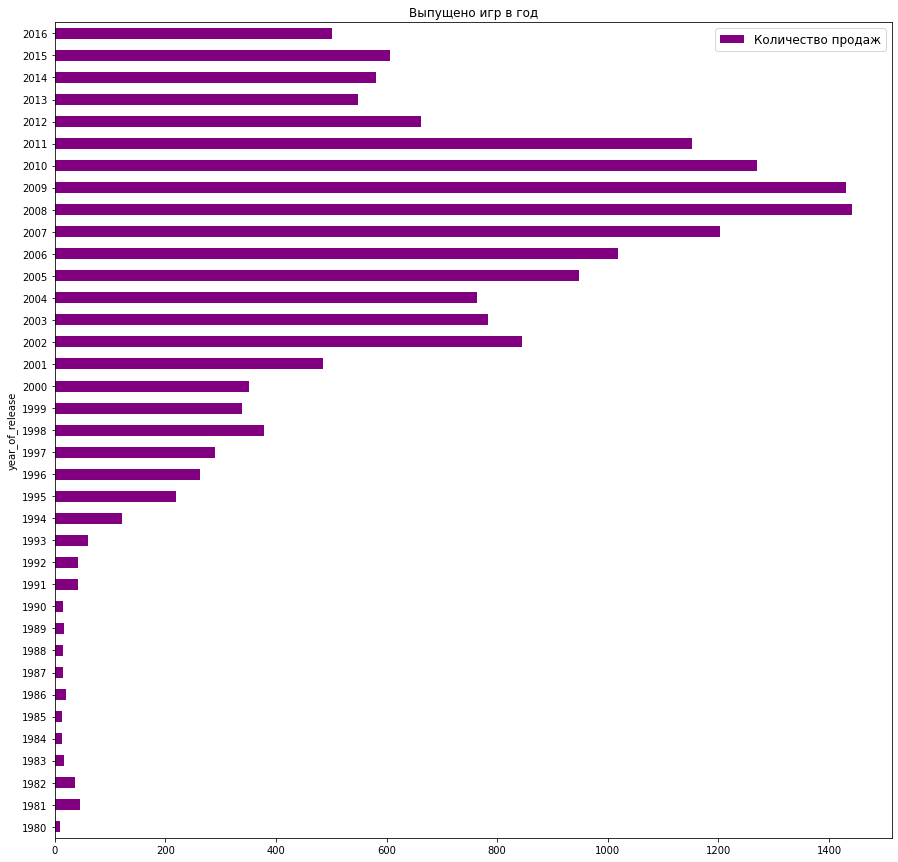

In [30]:
# выводим горизонтальный график по сводной таблице по продажам игры в год

df.pivot_table(index='year_of_release', 
               values='name', 
               aggfunc='count').sort_values('year_of_release').plot.barh(figsize=(15,15), color='purple')

plt.legend(['Количество продаж'], fontsize='large')
plt.title('Выпущено игр в год')

Как видно из графика, не стоит рассматривать продажи за период до `1994 года`, так как в то время выпускалось очень мало игр.

### Продажи по платформам

* Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создаём сводную таблицу:

In [31]:
# сводная таблица по платформам

platform_sales = df[df['year_of_release'] >= 1994].pivot_table(index='platform', values='sales', aggfunc='sum')

# сортировка и вывод 10 первых

platform_sales.sort_values('sales', ascending=False).head(10)

,sales
platform,
PS2,1247.16
X360,966.61
PS3,934.71
Wii,903.31
DS,804.26
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Возьмем для анализа `5` топовых платформ на период от `1997` до `2016` года и проанализируем **"жизнь"** консолей.

In [32]:
# присваиваем новый датасет с топовыми платформами

platform_top = platform_sales.sort_values('sales', ascending=False).head(5)

platform_top.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

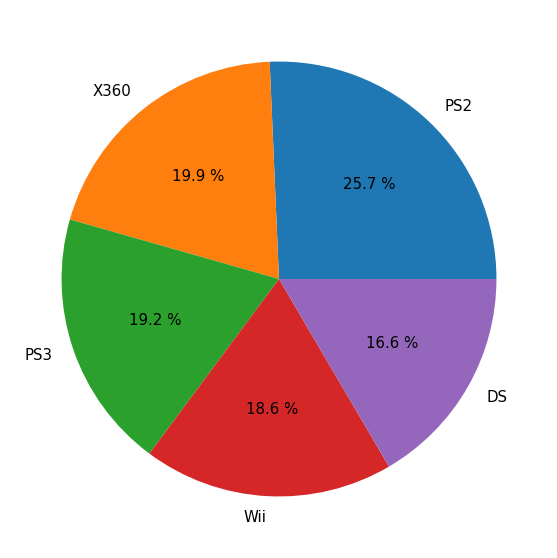

In [33]:
# создаём пирог распределения продаж с процентовкой

plt.figure(figsize=(10,10))
plt.pie(platform_top['sales'], labels=platform_top.index, autopct='%.1f %%', textprops={"fontsize":15})
plt.show()

Как видно их графика, процент продаж у PS2 самый высокий за весь период данной таблицы. Самый низкий из популярных - DS, всего лишь `16.6%`

In [34]:
# создаем сводную таблицу с продажами по годам и платформе

sales_per_year = df.pivot_table(index='year_of_release', 
                                columns='platform', 
                                values='sales', 
                                aggfunc='sum')\
                                .fillna(0)\
                                .reset_index(drop=False)


sales_per_year

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1989,0.63,0.00,0.00,0.00,0.00,64.97,0.00,0.00,0.00,0.00,0.00,7.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Возьмём выборку с выходом первой консоли - PS2 и построим графики.

In [35]:
# фильтр таблицы

sales_after_1994 = sales_per_year.query('year_of_release >= 1994')

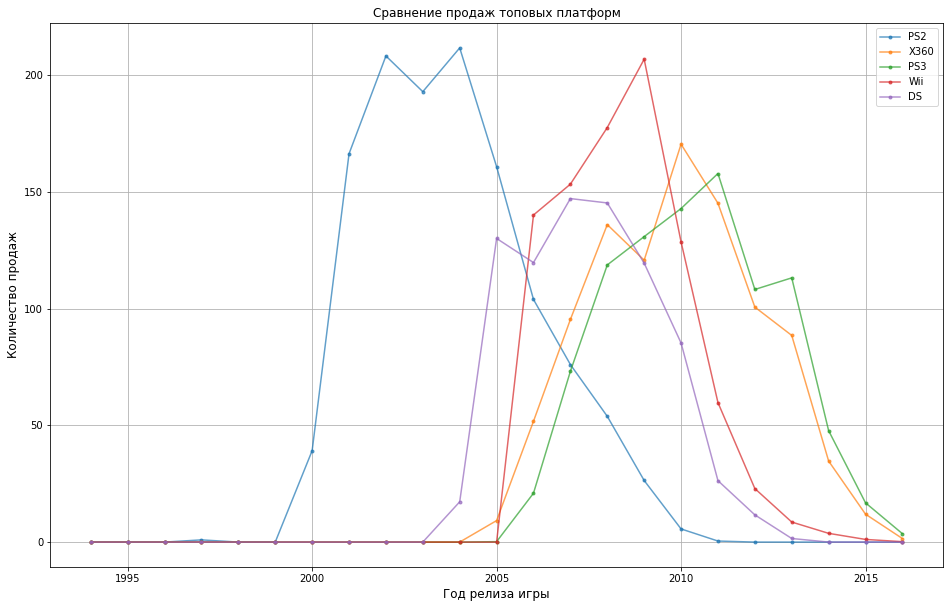

In [36]:
# сравниваем между собой с помощью сводного графика

f, ax = plt.subplots()

for graf in platform_top.index:
    sales_after_1994.plot(x='year_of_release', y=graf, figsize=(16,10), grid=True, label=graf, alpha=0.7, marker='.', ax=ax)

plt.legend(loc='upper right')
plt.title('Сравнение продаж топовых платформ')
plt.ylabel('Количество продаж', fontsize = 'large')
plt.xlabel('Год релиза игры', fontsize = 'large')
plt.show()

Рассмотрим графики ближе:

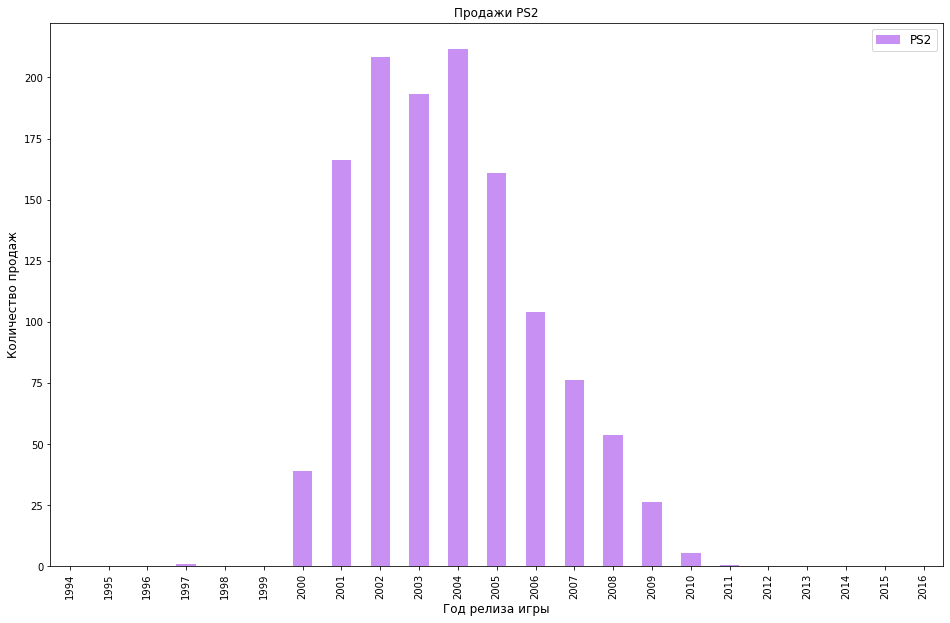

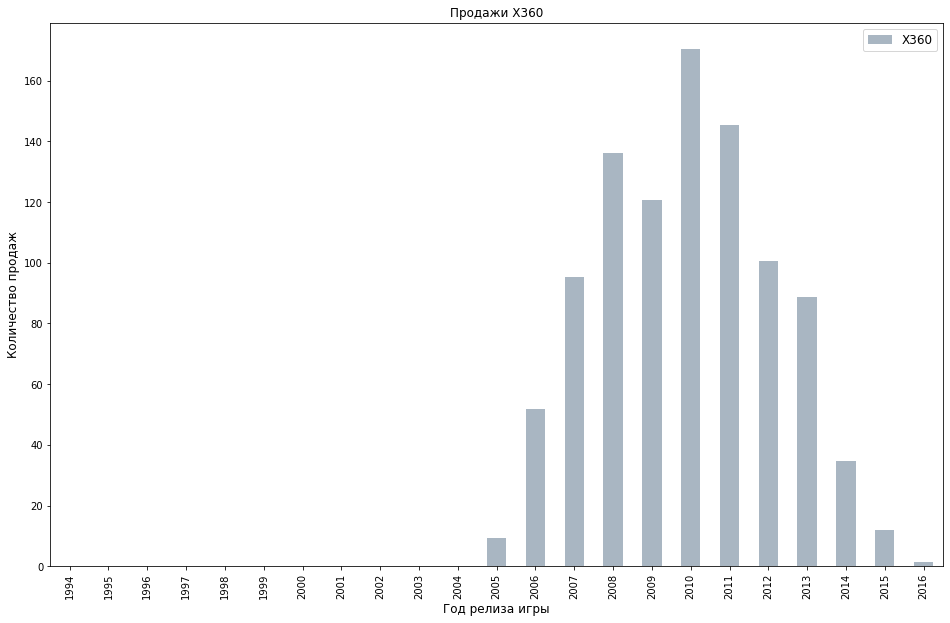

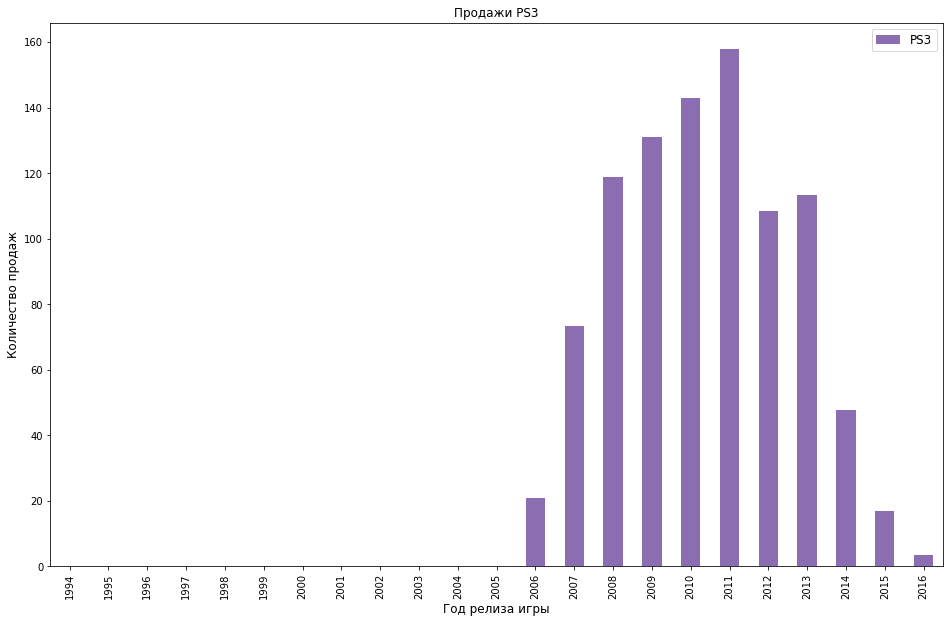

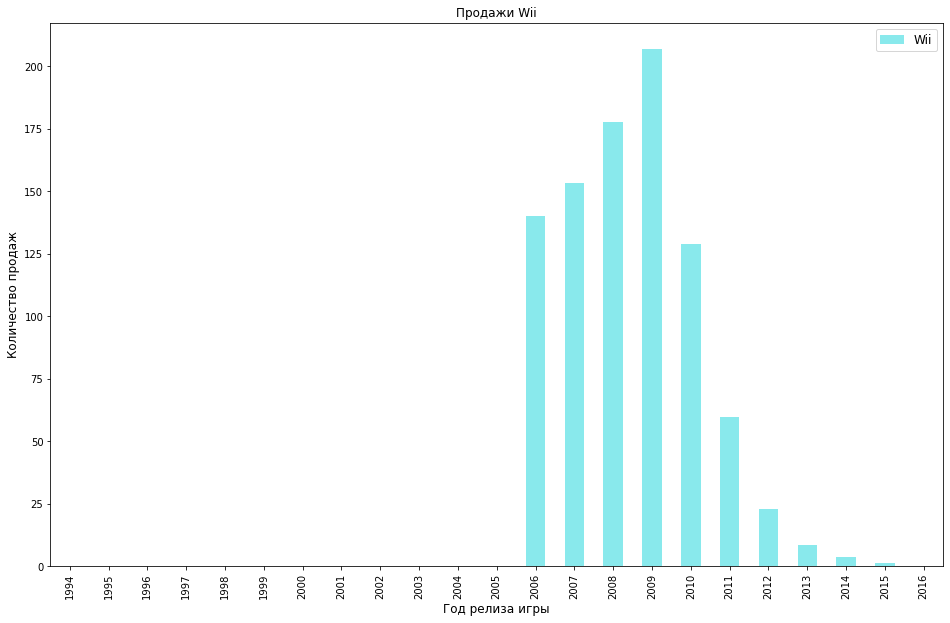

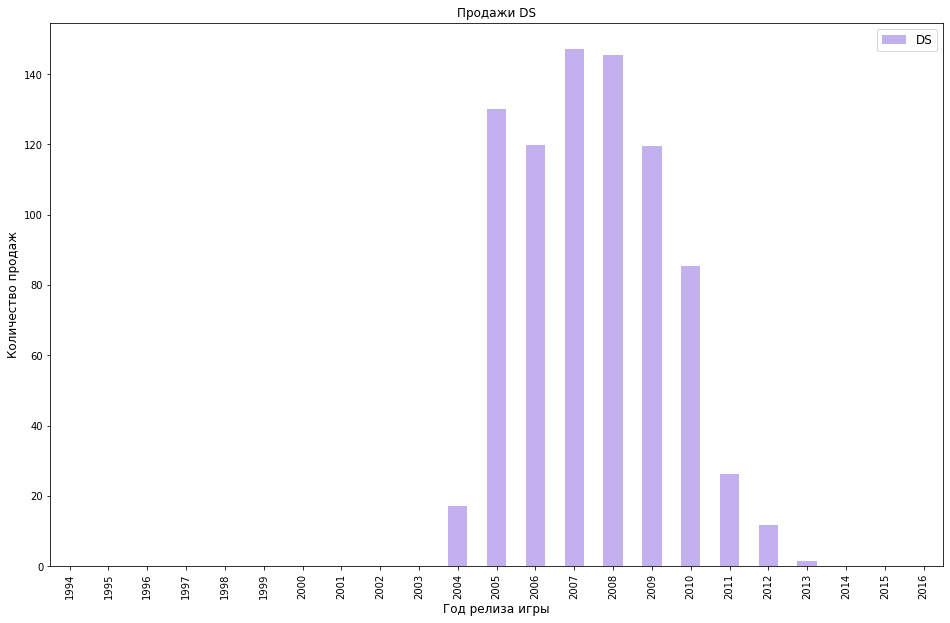

In [37]:
# запустим цикл для вывода графика - количество продаж в год по платформе

for graf in platform_top.index:
    sales_after_1994.plot.bar(x='year_of_release', y=graf, alpha=0.7, color=np.random.rand(3,), figsize=(16,10))
    plt.legend(loc='upper right', fontsize = 'large')
    plt.title(f'Продажи {graf}')
    plt.ylabel('Количество продаж', fontsize = 'large')
    plt.xlabel('Год релиза игры', fontsize = 'large')
    plt.show()

Как видно из графиков, характерная жизнь для консоли - `10 лет`. На первый и последний год, обычно, приходится меньшее число продаж. 

И, как видно из графиков, есть продажи у консоли PS2 за период 1997 года, такую ошибку надо исправить:

In [38]:
# фильтр для просмотра грешника

df.query('year_of_release == 1997 and platform == "PS2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2156,Wheel of Fortune,PS2,1997,Misc,0.47,0.36,0.0,0.12,<NA>,<NA>,E,0.95


In [39]:
# другой фильтр для уточнения

df.query('name == "Wheel of Fortune" and platform == "PS2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2156,Wheel of Fortune,PS2,1997,Misc,0.47,0.36,0.0,0.12,<NA>,<NA>,E,0.95


Дата релиза игры `Wheel of Fortune` - 2003 год. Исправим датасет:

In [40]:
# переприсваиваем, исходя из данных в гугле

df.loc[(df['name'] == "Wheel of Fortune") & (df['platform'] == 'PS2'), 'year_of_release'] = 2003

In [41]:
# проверяем итог

df.query('name == "Wheel of Fortune" and platform == "PS2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2156,Wheel of Fortune,PS2,2003,Misc,0.47,0.36,0.0,0.12,<NA>,<NA>,E,0.95


### Выбор актуального периода

**Исходя из предыдущих пунктов:**

Актуальный период, на которые приходятся основные продажи - `3` лет.
На такой период времени "жизни" консоли приходится большее количество продаж.

Не учитываем в работе данные за предыдущие годы.

### Лидеры продаж

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [42]:
# фильтруем актуальный период и делаем сводную таблицу

df_actual = df.query('year_of_release >= 2014')

df_actual_pivot = df_actual.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').fillna(0)
df_actual_pivot.reset_index(inplace=True)
df_actual_pivot['year_of_release'] = pd.to_datetime(df_actual_pivot['year_of_release'], format='%Y')

df_actual_pivot

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014-01-01,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015-01-01,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016-01-01,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


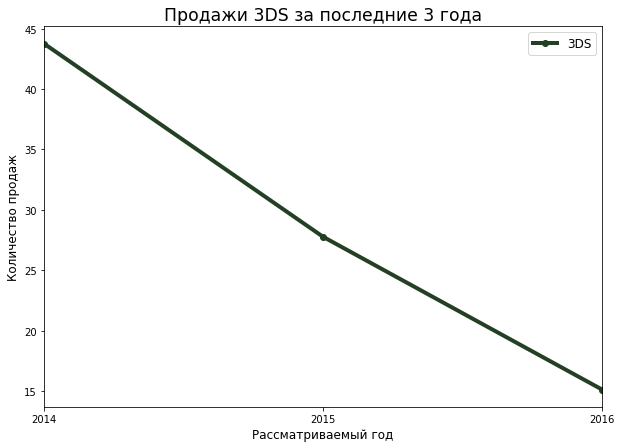

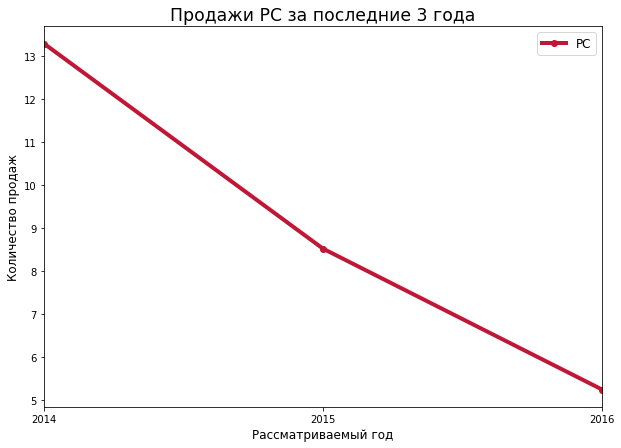

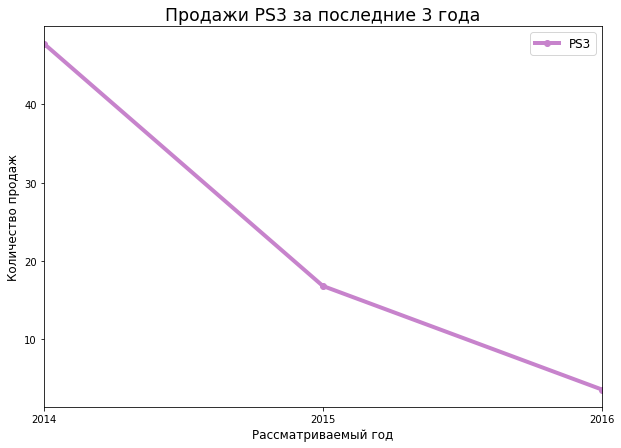

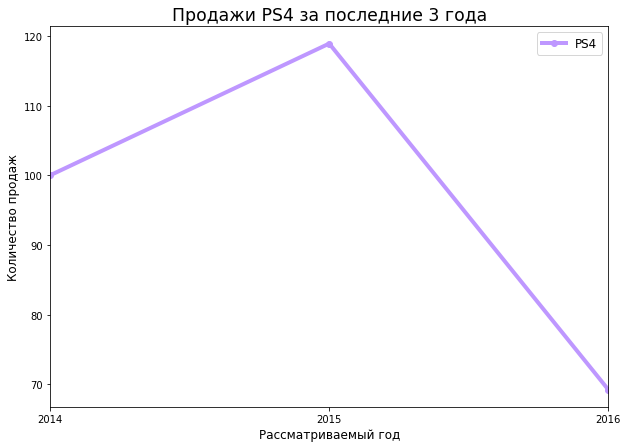

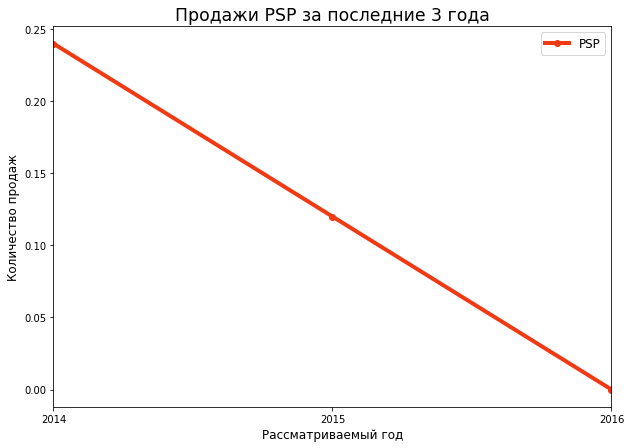

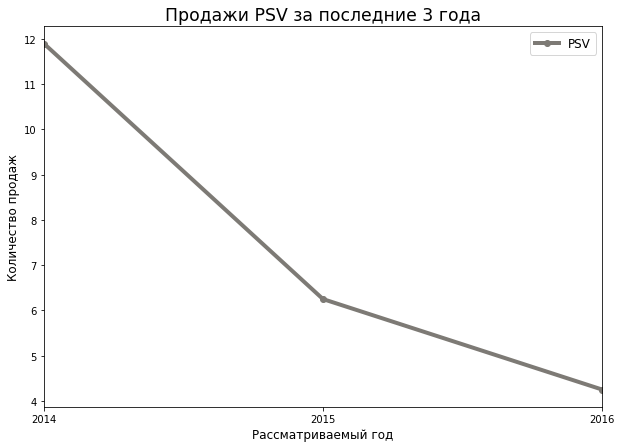

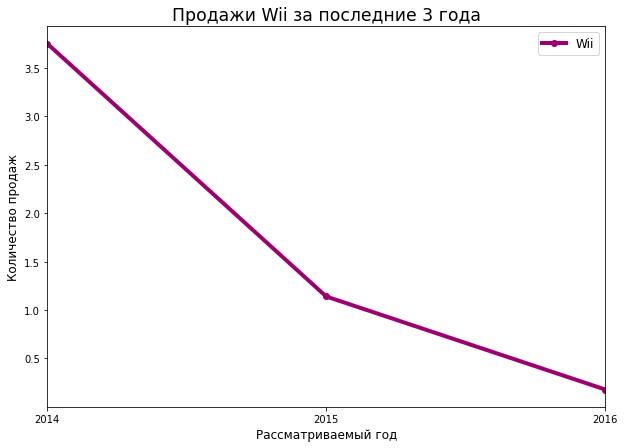

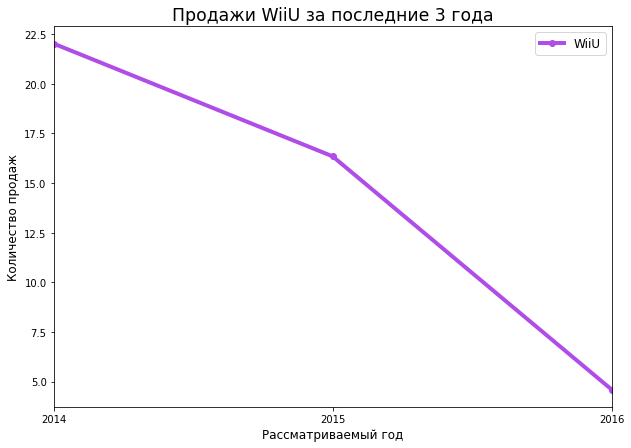

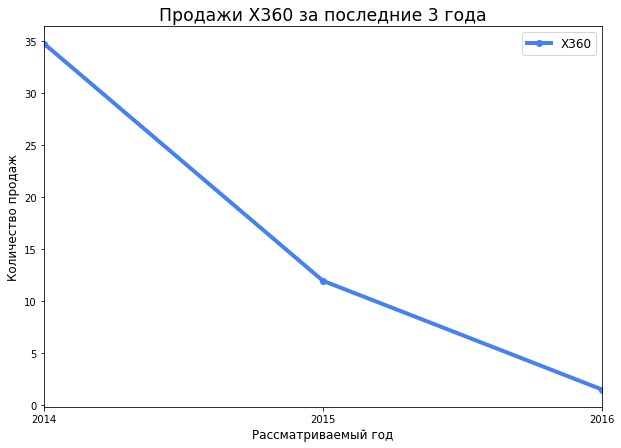

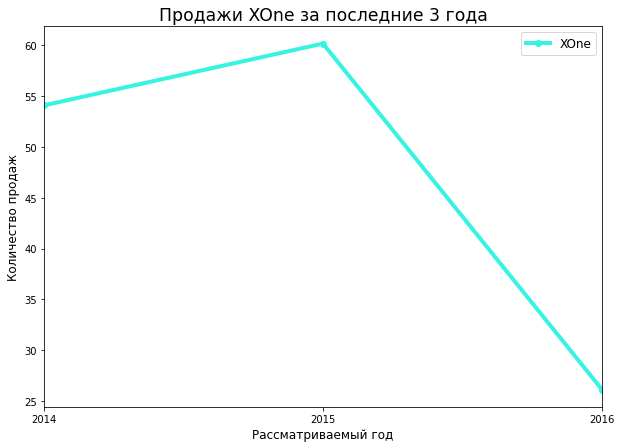

In [43]:
# создаём функцию по созданию графиков каждой платформы

for graf in df_actual_pivot.columns[1:]:
    df_actual_pivot.plot(x='year_of_release',
                         y=graf,
                         label=graf, 
                         marker='o', 
                         linewidth=4,
                         c=np.random.rand(3,), figsize=(10,7))
    plt.legend(loc='upper right', fontsize = 'large')
    plt.title(f'Продажи {graf} за последние 3 года', fontsize = 'xx-large')
    plt.ylabel('Количество продаж', fontsize = 'large')
    plt.xlabel('Рассматриваемый год', fontsize = 'large')
    plt.show()

Объединим графики, чтобы делать общие выводы:

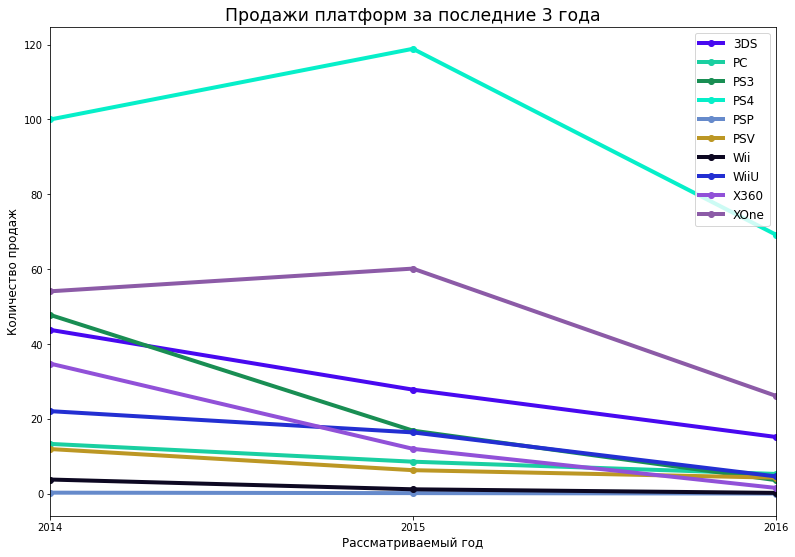

In [44]:
# соединяем графики вместе для наглядности через цикл

f, ax = plt.subplots(figsize=(13, 9))
for graf in df_actual_pivot.columns[1:]:
    df_actual_pivot.plot(label=graf,
                         y=graf,
                         x='year_of_release',
                         marker='o', 
                         linewidth=4,
                         c=np.random.rand(3,), 
                         ax=ax)
plt.legend(loc='upper right', fontsize = 'large')
plt.title(f'Продажи платформ за последние 3 года', fontsize = 'xx-large')
plt.ylabel('Количество продаж', fontsize = 'large')
plt.xlabel('Рассматриваемый год', fontsize = 'large')
plt.show()

Исходя из графиков, можно выделить:

* продажи по всем платформам за последние `3` лет снизились, так как данные за 2016 год не полные.
* нет ни одной плафтормы, где продажи растут, но нельзя полностью рассчитывать, что платформа перестанет приносить прибыль
* есть только 4 потенциально прибыльные платформы: Nintendo 3DS, Xbox ONE, PS4 и PC (так как актуальность PC будет всегда). Стоит сделать ставку на 2017 год именно на эти платформы, но учесть, что продажи по ним падают.
* самая прибыльная платформа - PS4.

### Глобальные продажи игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период:

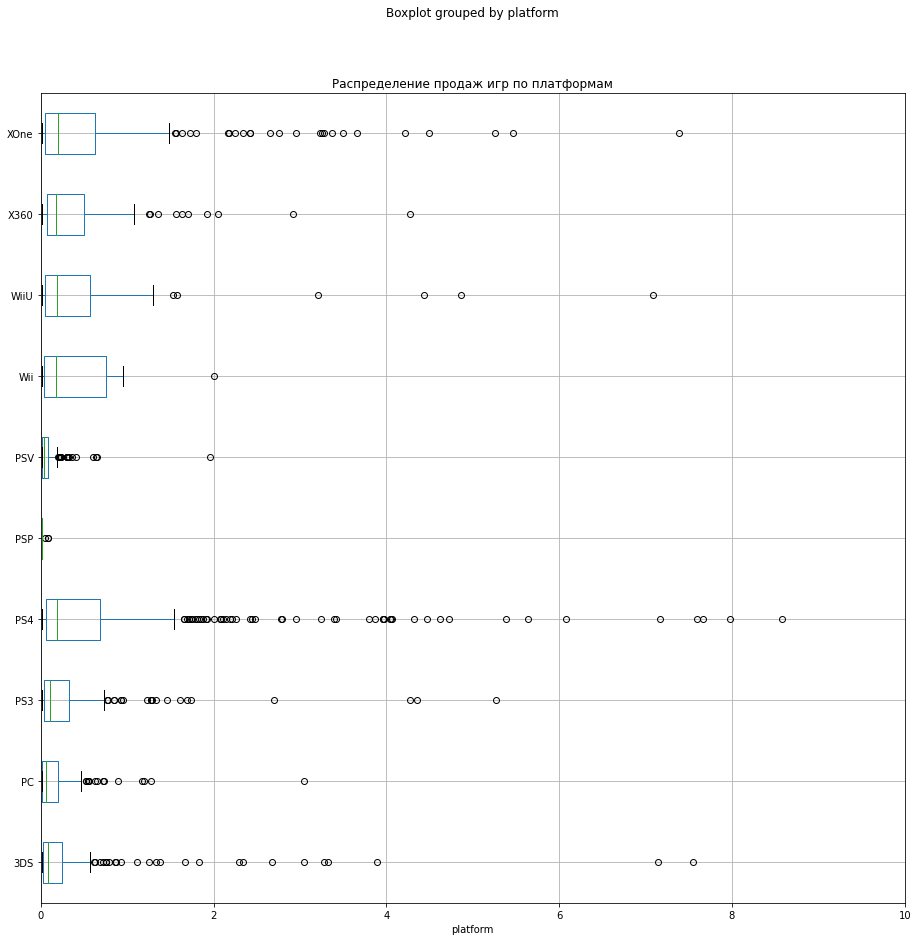

In [45]:
# ящик с усами по всем платформам актуального времени

df_actual.boxplot('sales', by='platform', vert=False, figsize=(15, 15))
plt.title('Распределение продаж игр по платформам')
plt.xlim(0, 10) 
plt.show()

Увеличим выборку:

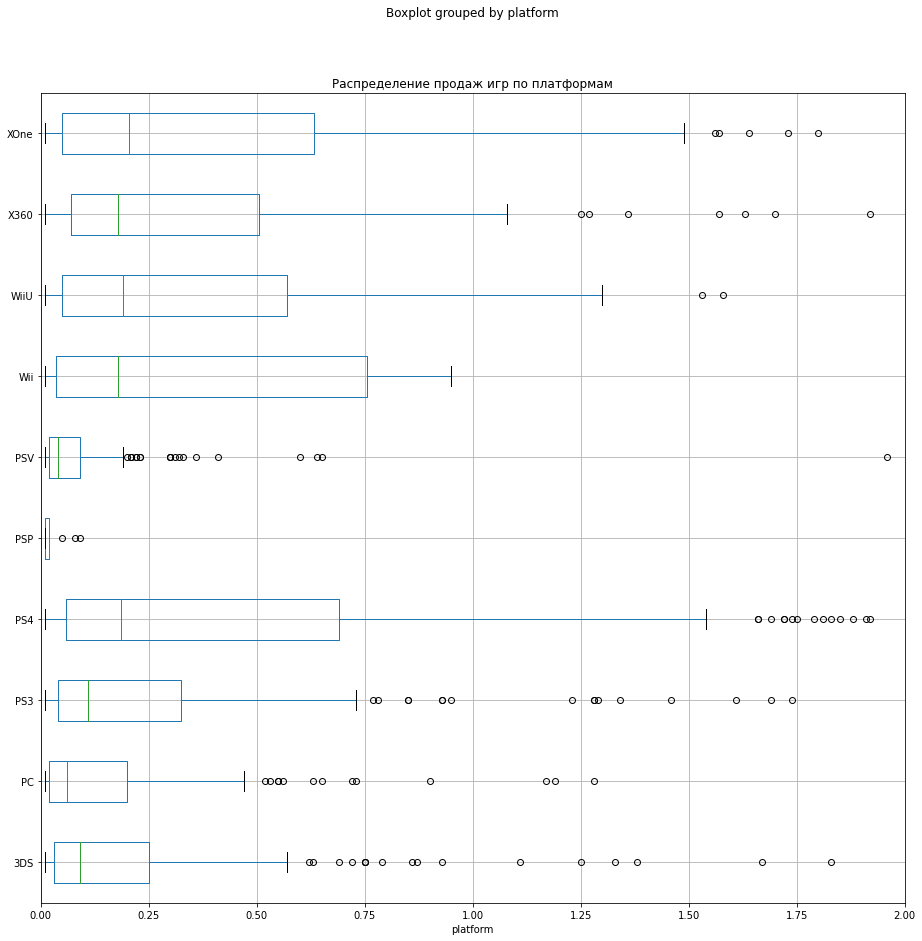

In [46]:
# ящик с усами по всем платформам актуального времени

df_actual.boxplot('sales', by='platform', vert=False, figsize=(15, 15))
plt.title('Распределение продаж игр по платформам')
plt.xlim(0, 2) 
plt.show()

Как видно из полученных графиков, выбросы показывают потенциально прибильные игры, которые принесли больше всего продаж, относительно общей совокупности остальных игр.

Больше всего игры выпущено на самых топовых платформах, которые были выделены ранее, и на них самые большие продажи. И конечно, игровые хиты принадлежат этим же платформам.

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

**Построим диаграмму рассеяния по платформе PlayStation 2**

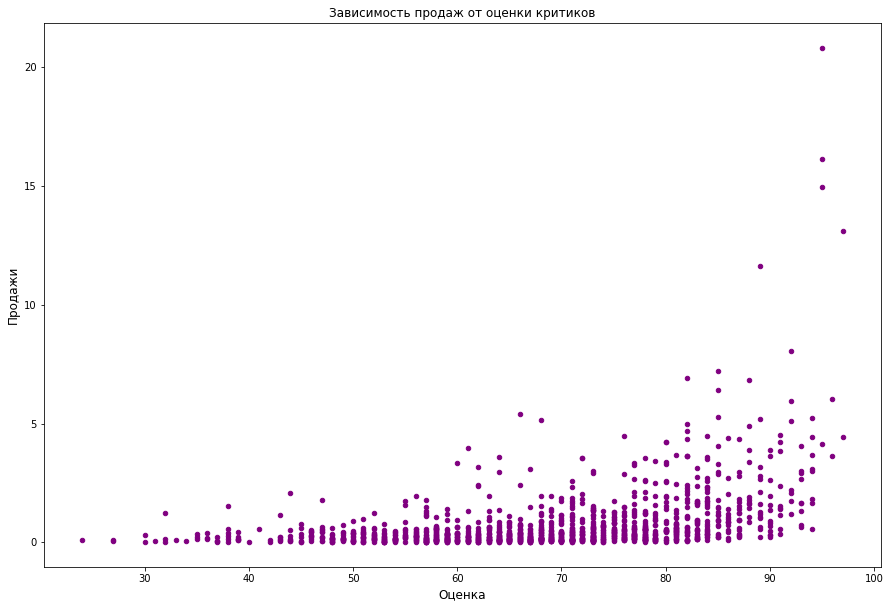

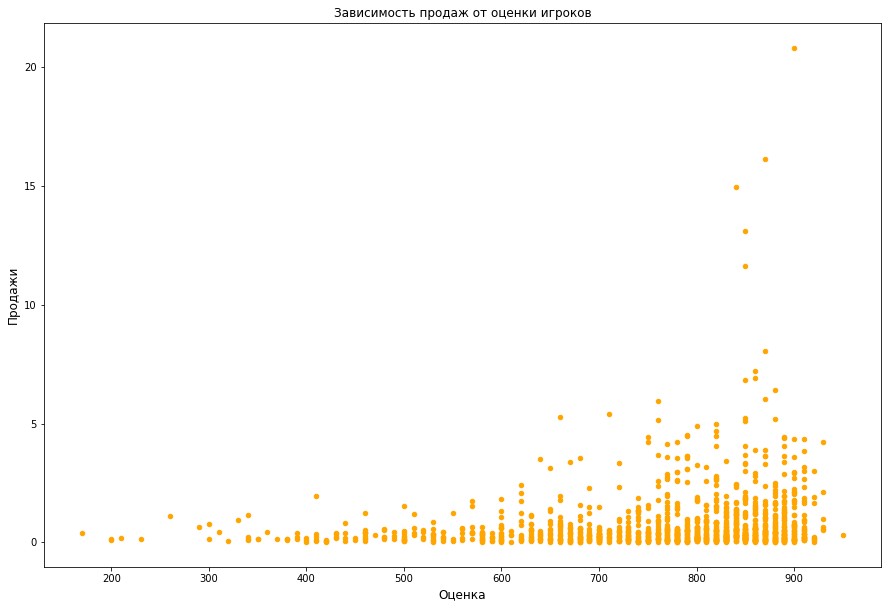

In [47]:
# создаём две диаграммы для PS2 с оценкой критиков и игроков

df[df['platform'] == 'PS2'].plot.scatter(y='sales', x='critic_score', figsize=(15,10), c='purple')
plt.title('Зависимость продаж от оценки критиков')
plt.ylabel('Продажи', fontsize = 'large')
plt.xlabel('Оценка', fontsize = 'large')
plt.show()

df[df['platform'] == 'PS2'].plot.scatter(y='sales', x='user_score', figsize=(15,10), c='orange')
plt.title('Зависимость продаж от оценки игроков')
plt.ylabel('Продажи', fontsize = 'large')
plt.xlabel('Оценка', fontsize = 'large')
plt.show()

Отзывы пользователей и критиков прямо влияют на продажи консоли PS2. Чем выше рейтинг у пользователей или критиков - тем выше продажи.

**Посчитаем корреляцию Пирсона между отзывами и продажами PlayStation 2**

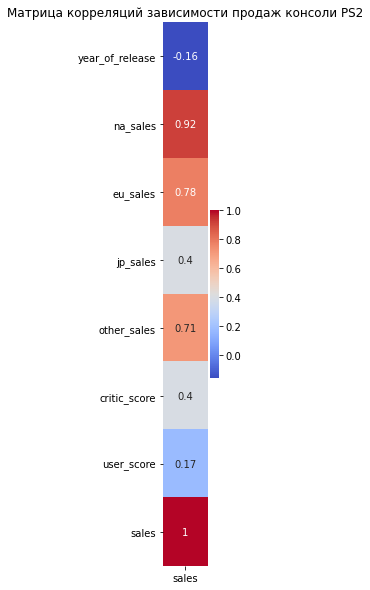

In [48]:
# создаем хитмэп с Пирсоном

plt.figure(figsize=(1, 10))
plt.title('Матрица корреляций зависимости продаж консоли PS2')

sns.heatmap(df[df['platform'] == 'PS2'].corr()[['sales']], annot = True, cmap = 'coolwarm')

plt.show()

In [49]:
# считаем коэффициенты Пирсона

df[df['platform'] == 'PS2'].corr()['sales']

year_of_release   -0.160795
na_sales           0.920762
eu_sales           0.781918
jp_sales           0.398318
other_sales        0.714651
critic_score       0.395435
user_score         0.172866
sales              1.000000
Name: sales, dtype: float64

**Посчитаем корреляцию Спирмена между отзывами и продажами PlayStation 2**

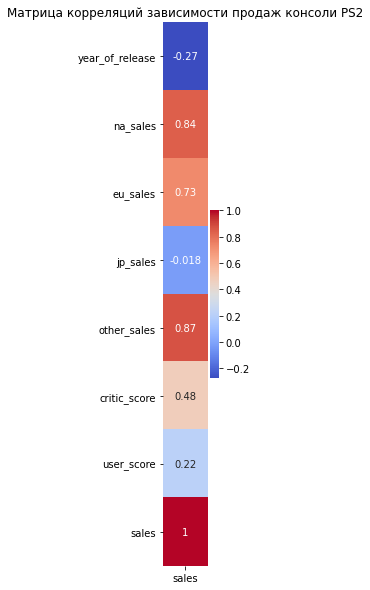

In [50]:
# Проверим Спирмена

plt.figure(figsize=(1, 10))
plt.title('Матрица корреляций зависимости продаж консоли PS2')

sns.heatmap(df[df['platform'] == 'PS2'].corr(method='spearman')[['sales']], annot = True, cmap = 'coolwarm')

plt.show()

Вывод:

* Самые большие продажи у игр PS2, судя по диаграмме рассеяния, которые имеют самые большие рейтинги игроков или критиков.
* Исходя из корреляции Пирсона, из-за выбросов, оценки пользователей и критиков мало влияют на продажи, в то время, как корреция Спирмена показывает небольшую зависимость от оценки пользователей и большую от оценки критиков.

**Построим диаграмму рассеяния по топовым платформам за актуальный период**

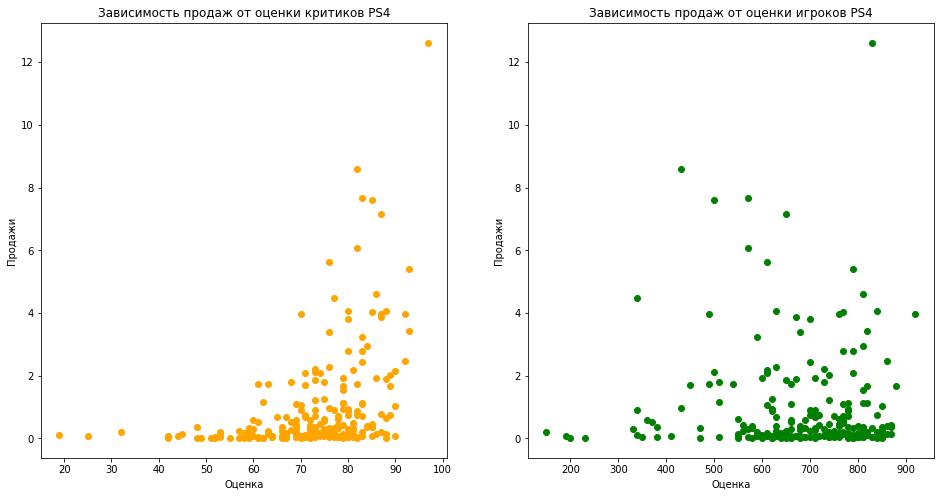

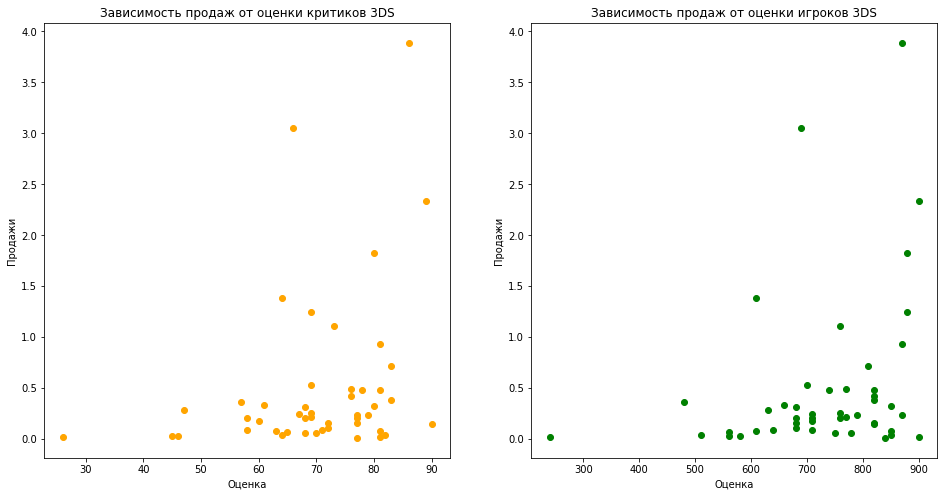

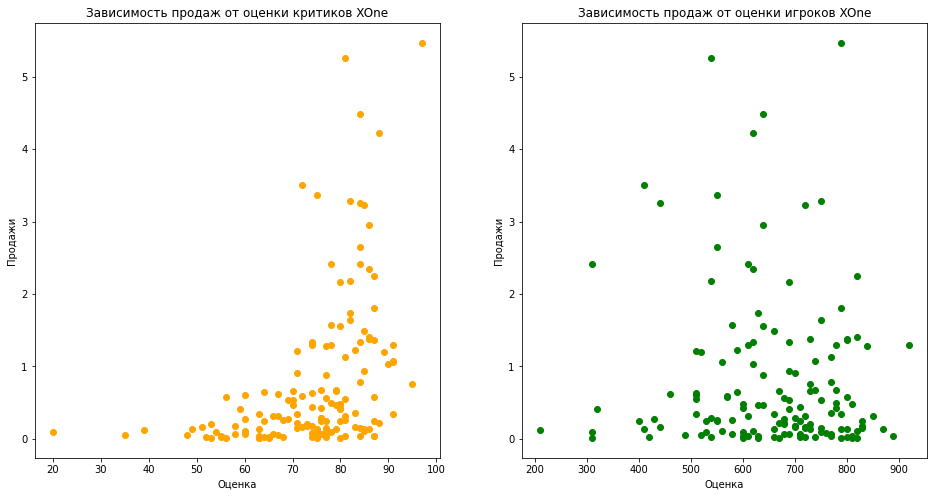

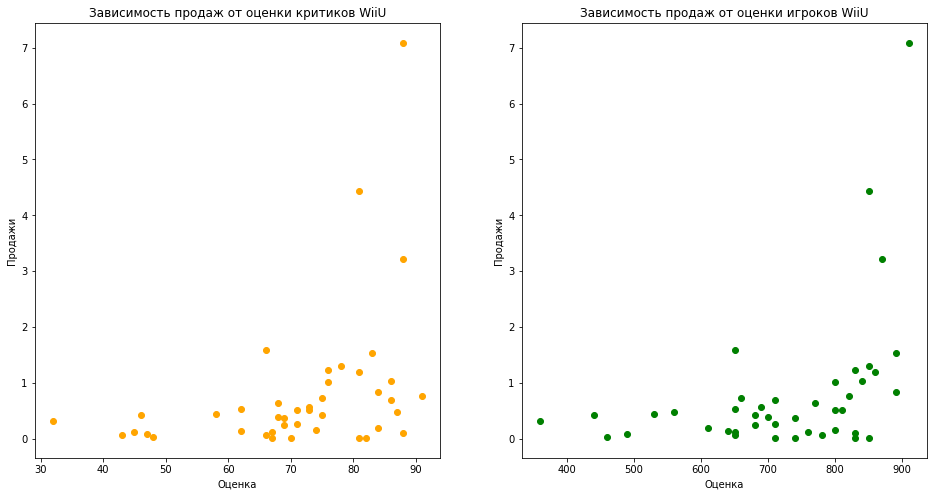

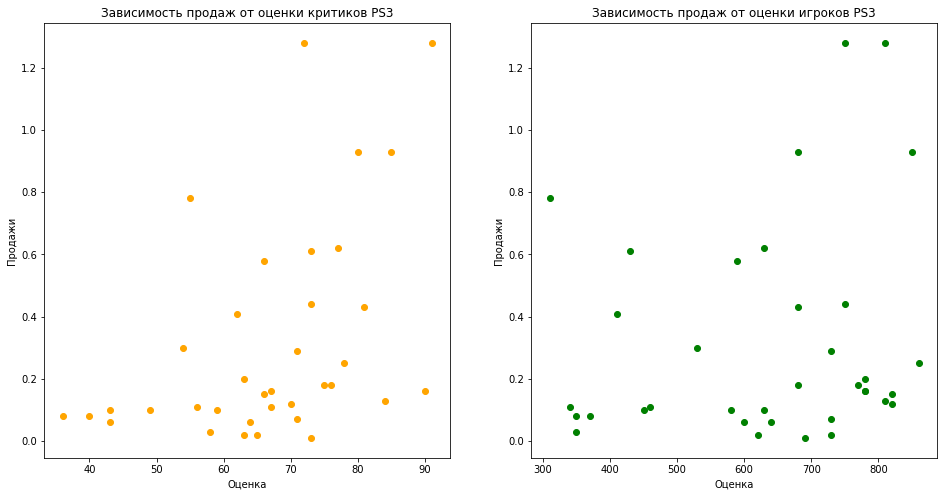

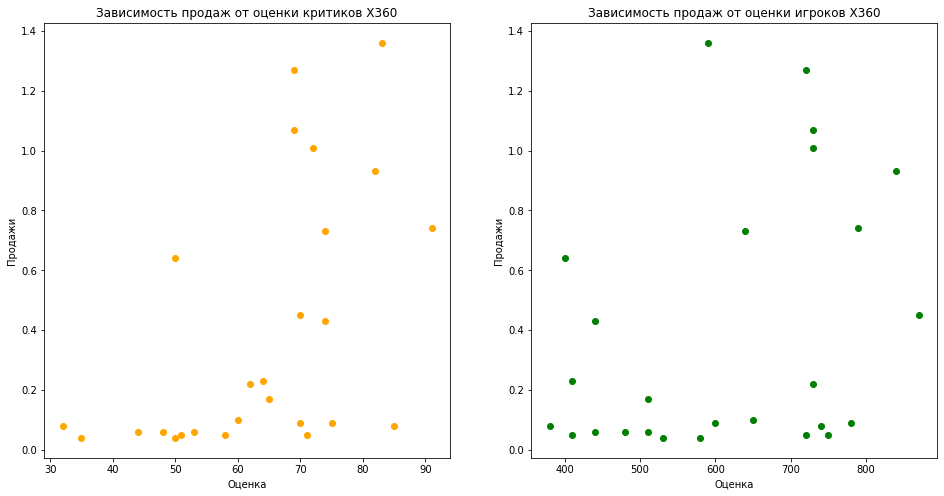

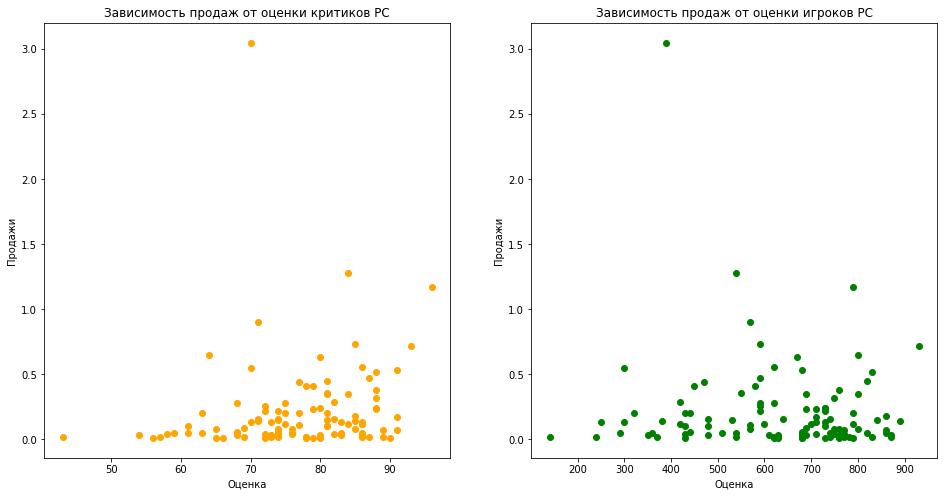

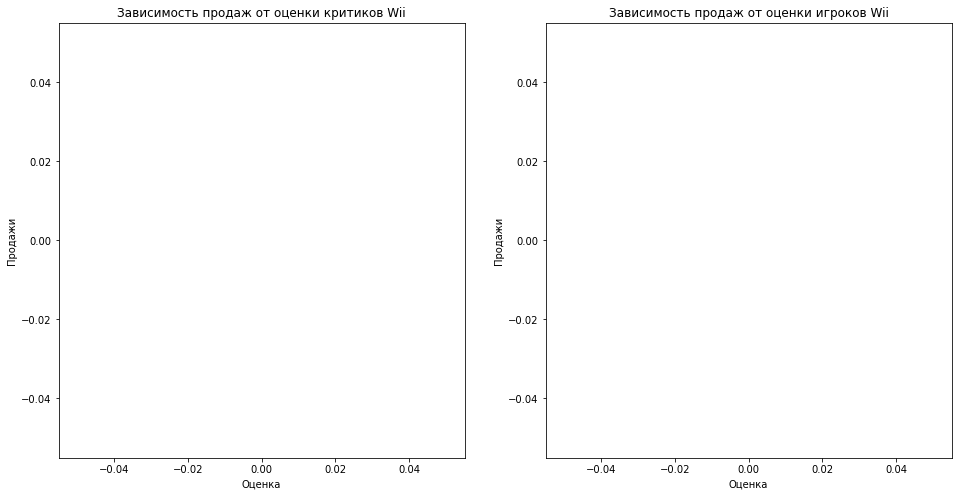

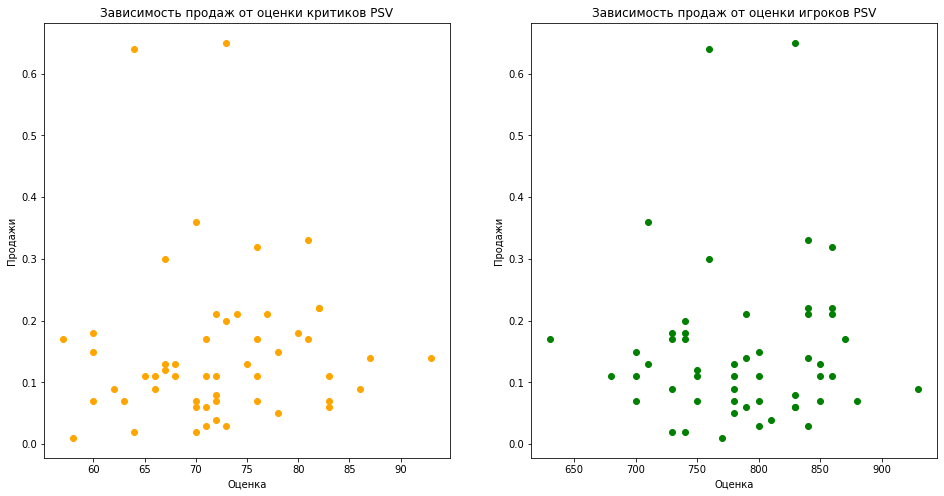

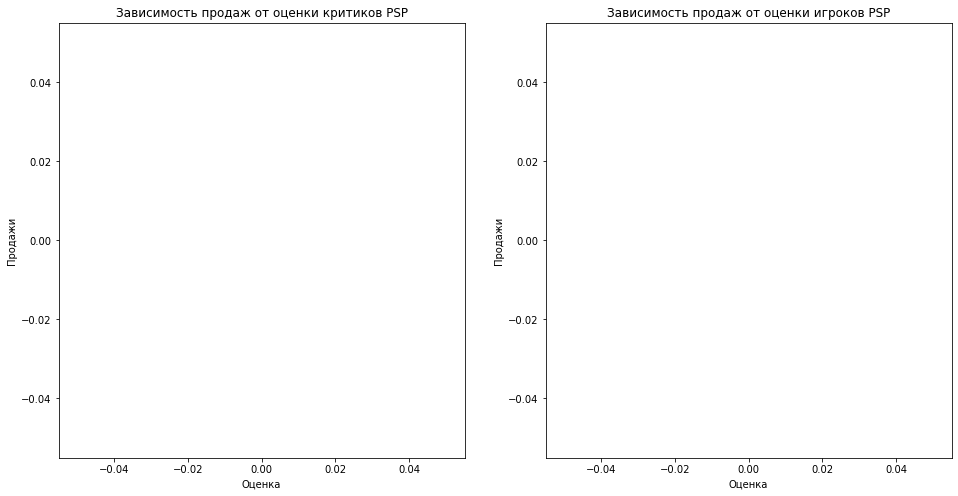

In [51]:
# запустим цикл, который создает два графика по оси х - платформе и заполняет их диаграммами рассеивания

for graf in df_actual['platform'].unique():
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    axs[0].scatter(data=df_actual.dropna()[df_actual['platform'] == graf], # график слева
                   y='sales', 
                   x='critic_score', 
                   c='orange')
    axs[1].scatter(data=df_actual.dropna()[df_actual['platform'] == graf], # график справа
                   y='sales', 
                   x='user_score', 
                   c='green')
    axs[0].set_title(f'Зависимость продаж от оценки критиков {graf}')
    axs[1].set_title(f'Зависимость продаж от оценки игроков {graf}')
    for ax in axs.flat:
        ax.set(xlabel='Оценка', ylabel='Продажи')
    plt.show()

**Посчитаем корреляцию Спирмена между отзывами и продажами актуальных платформ за актуальный период**

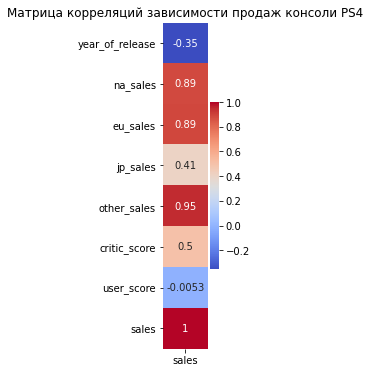

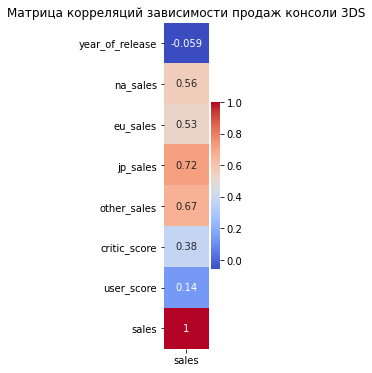

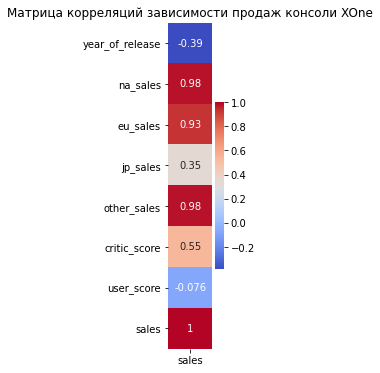

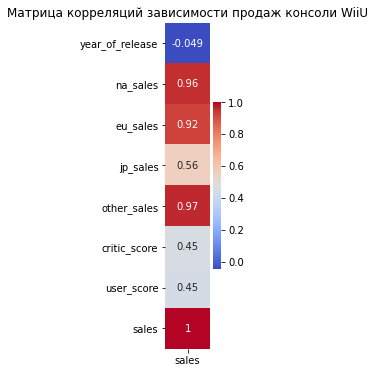

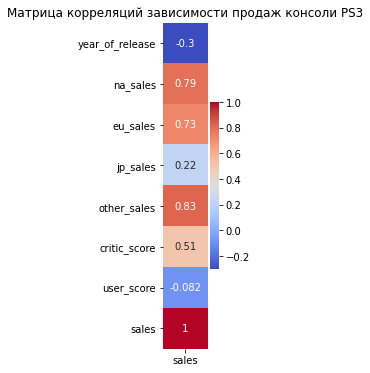

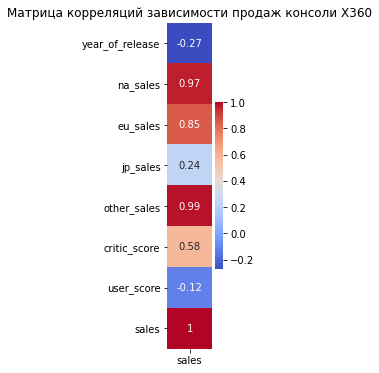

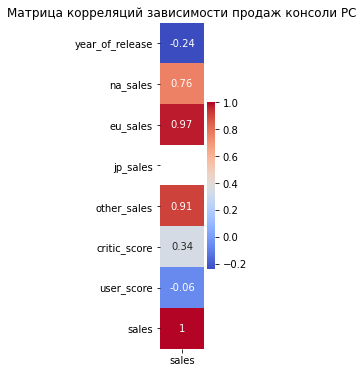

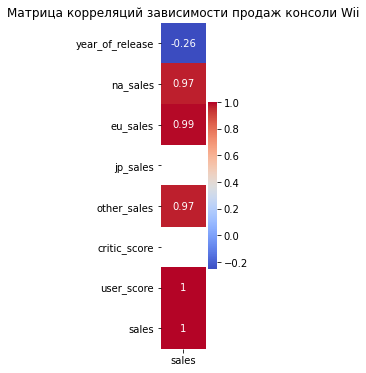

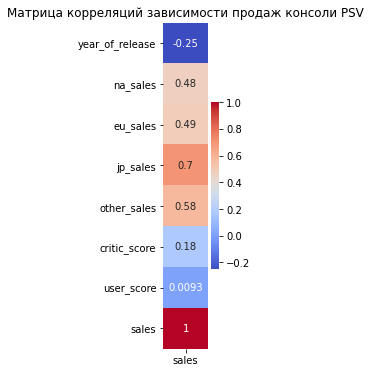

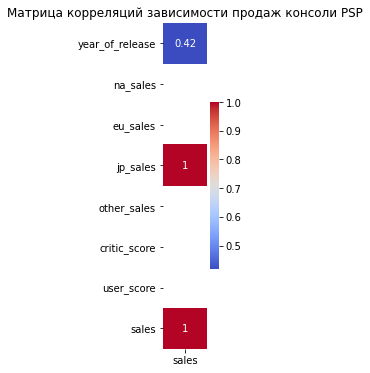

In [52]:
# создаем цикл для построения хитмэп с Пирсоном по платформам

for graf in df_actual['platform'].unique():
    plt.figure(figsize=(1, 6))
    plt.title(f'Матрица корреляций зависимости продаж консоли {graf}')
    sns.heatmap(df_actual[df_actual['platform'] == graf].corr(method='spearman')[['sales']], 
                annot = True, 
                cmap = 'coolwarm')
    plt.show()

Коэффициенты для PSP и Wii не дают общих выводов за 3 года. Значений слишком мало.

Исходя из остальных полученных графиков расеяния и коэффициентов Спирмена, можно сделать вывод, что по всем платформам оценка пользователей влияет на количество продаж. Чем оценки выше - тем выше продажи.

### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. 

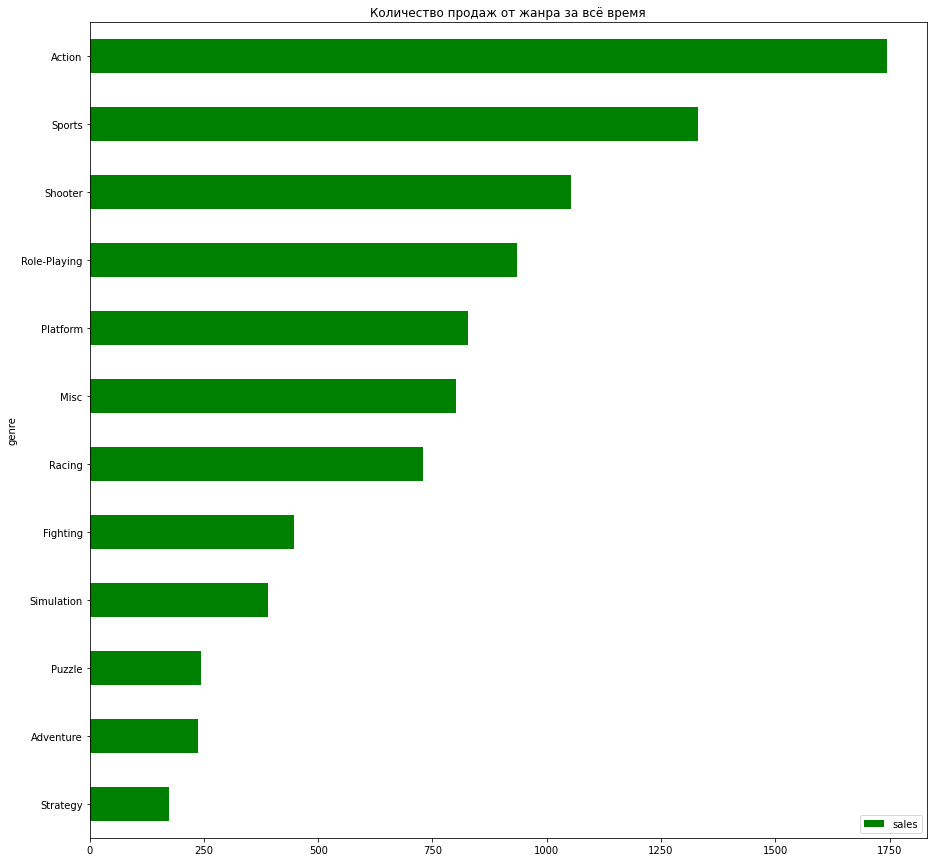

In [53]:
# создаём сводную таблицу, отсортируем и выведем график

genre_pivot = df.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values('sales')

genre_pivot.plot.barh(figsize=(15,15), color='green')
plt.title('Количество продаж от жанра за всё время')
plt.show()

**5 самых популярных жанров по миру за всё время:**

1. Action
2. Sports
3. Shooter
4. Role-Playing
5. Platform

**5 самых непопулярных жанров по миру за всё время:**

1. Strategy
2. Adventure
3. Puzzle
4. Simulation
5. Fighting


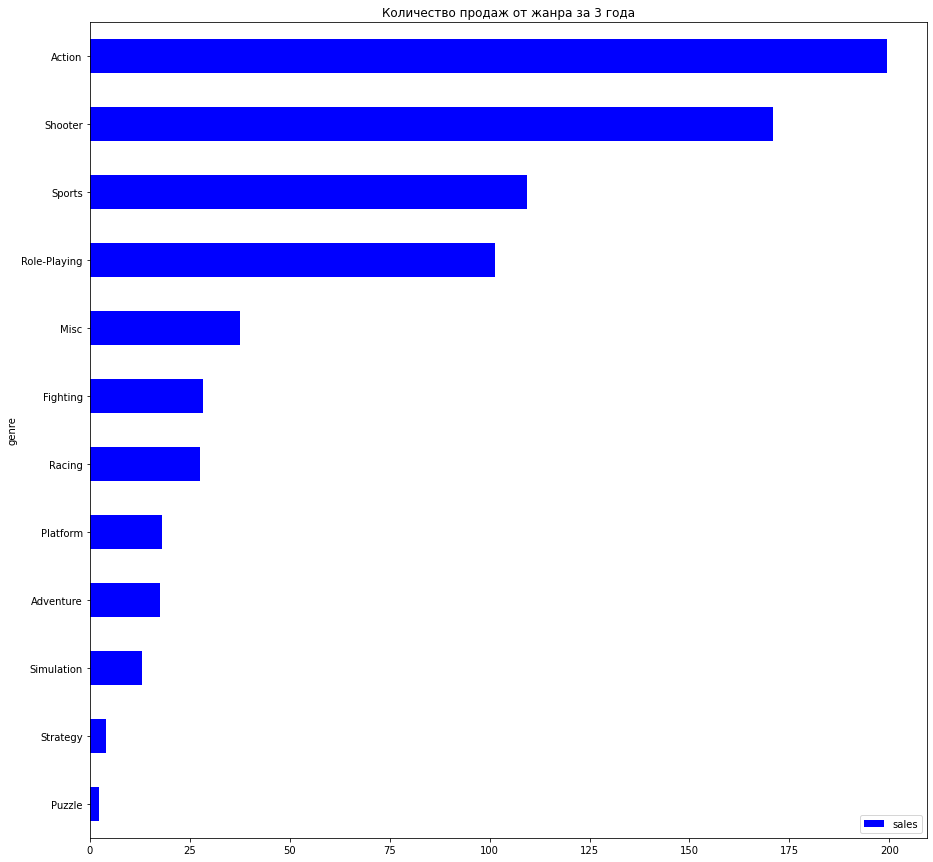

In [54]:
# повторяем действия для актуального времени

genre_pivot_actual = df_actual.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values('sales')

genre_pivot_actual.plot.barh(figsize=(15,15), color='blue')
plt.title('Количество продаж от жанра за 3 года')
plt.show()

**5 самых популярных жанров по миру за 3 года:**

1. Action
2. Shooter
3. Role-Playing
4. Sports
5. Misc

**5 самых непопулярных жанров по миру за 3 года:**

1. Puzzle
2. Strategy
3. Adventure
4. Simulation
5. Fighting

> Добавим анализ по средней и медиане:

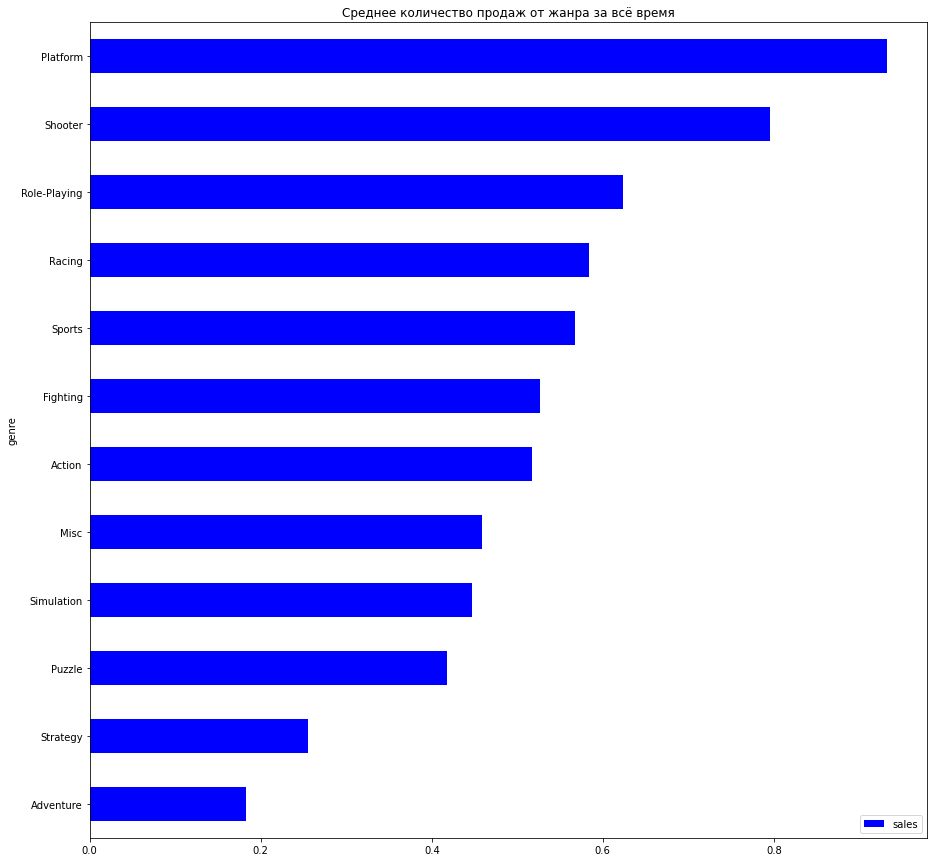

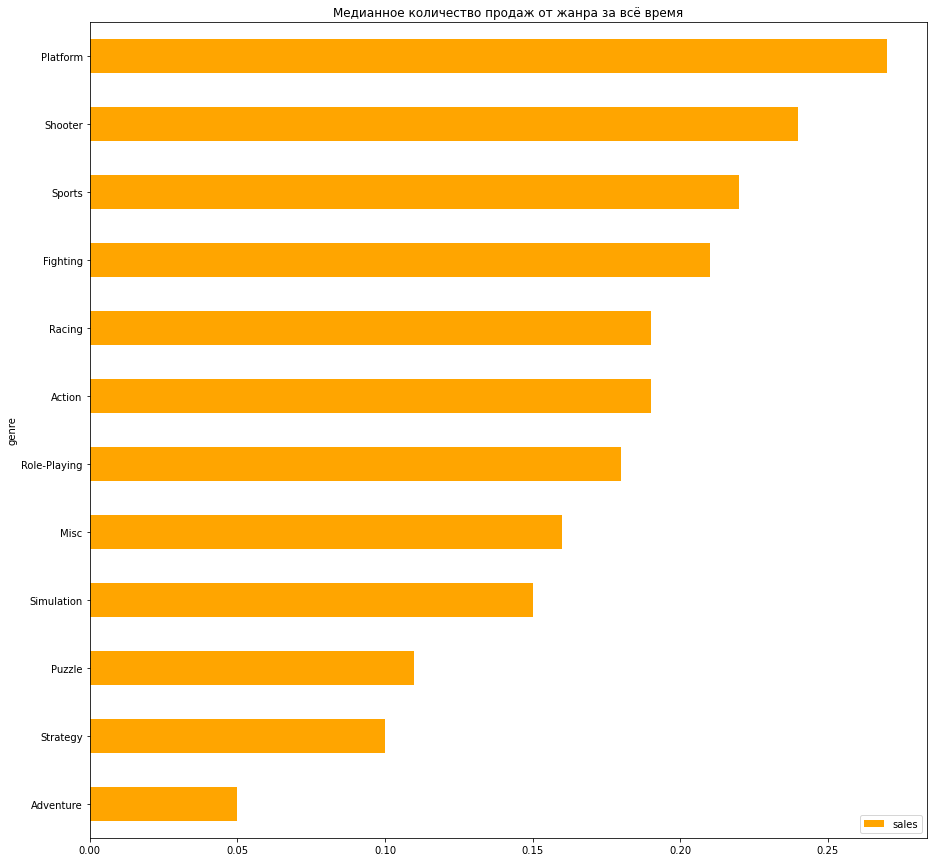

In [55]:
# создаём сводную таблицу, отсортируем и выведем график

genre_pivot = df.pivot_table(index='genre', values='sales', aggfunc='mean').sort_values('sales')
genre_pivot.plot.barh(figsize=(15,15), color='blue')
plt.title('Среднее количество продаж от жанра за всё время')
plt.show()

genre_pivot = df.pivot_table(index='genre', values='sales', aggfunc='median').sort_values('sales')
genre_pivot.plot.barh(figsize=(15,15), color='orange')
plt.title('Медианное количество продаж от жанра за всё время')
plt.show()

**5 самых популярных жанров по среднему значению продаж по миру за всё время:**

1. Platform
2. Shooter
3. Role-Playing
4. Racing
5. Sports


**5 самых популярных жанров по медианному значению продаж по миру за всё время:**

1. Platform
2. Shooter
3. Sports
4. Fighting
5. Racing

**5 самых непопулярных жанров по среднему и медианному значению продаж по миру за всё время:**

1. Adventure
2. Strategy
3. Puzzle
4. Simulation
5. Misc

Самые популярные жанры в среднем продаются чаще, чем игры непопулярных жанров. На них стоит обратить внимание при прогнозировании следующих годов.

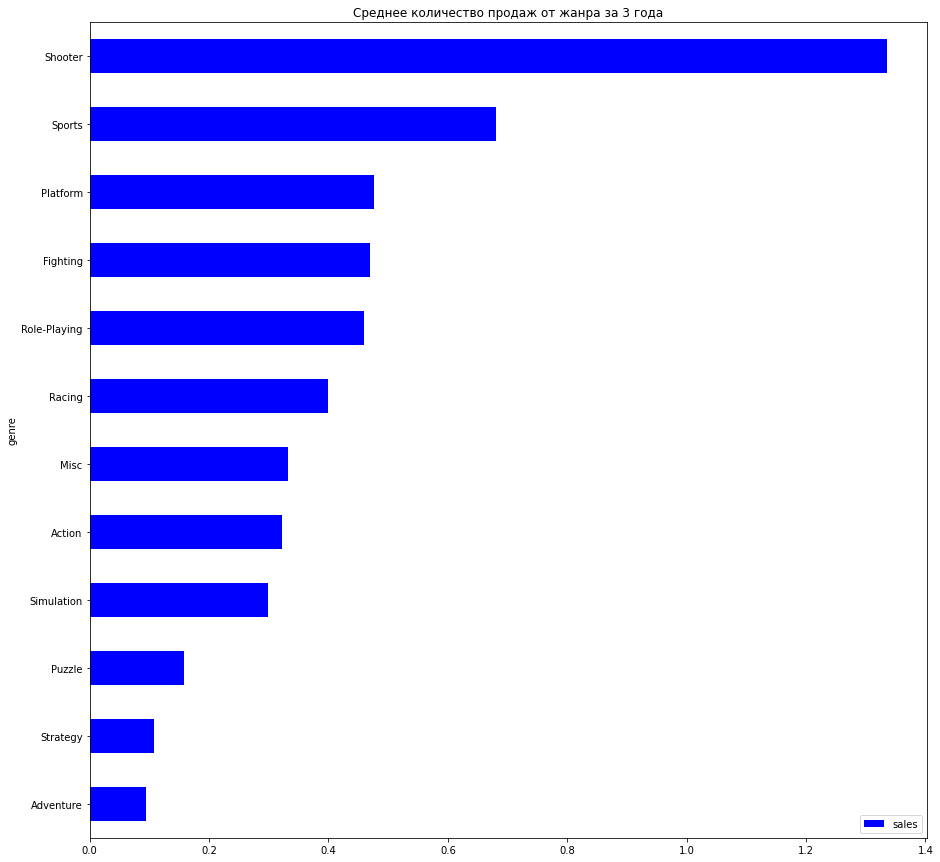

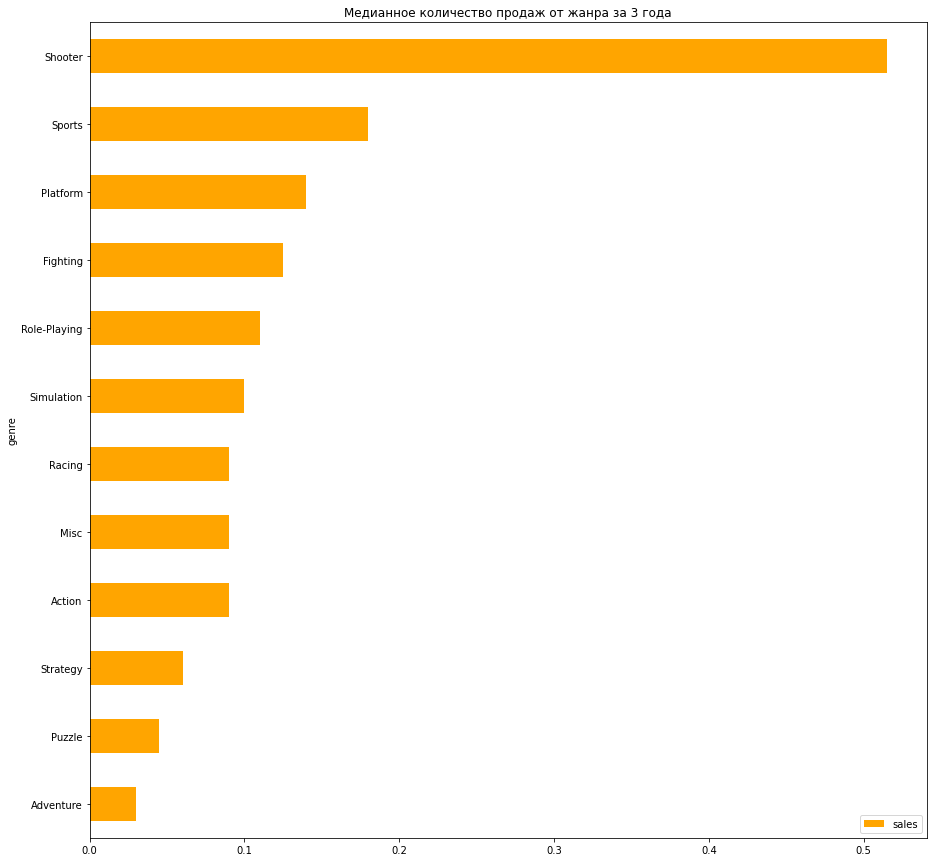

In [56]:
# создаём сводную таблицу, отсортируем и выведем график

genre_pivot = df_actual.pivot_table(index='genre', values='sales', aggfunc='mean').sort_values('sales')
genre_pivot.plot.barh(figsize=(15,15), color='blue')
plt.title('Среднее количество продаж от жанра за 3 года')
plt.show()

genre_pivot = df_actual.pivot_table(index='genre', values='sales', aggfunc='median').sort_values('sales')
genre_pivot.plot.barh(figsize=(15,15), color='orange')
plt.title('Медианное количество продаж от жанра за 3 года')
plt.show()

**5 самых популярных жанров по среднему и медианному значению продаж по миру за 3 года:**

1. Shooter
2. Sports
3. Platform
4. Fighting
5. Role-playing

**5 самых непопулярных жанров по среднему значению продаж по миру за 3 года:**

1. Adventure
2. Strategy
3. Puzzle
4. Simulation
5. Action

**5 самых непопулярных жанров по медианному значению продаж по миру за 3 года:**

1. Adventure
2. Puzzle
3. Strategy
4. Action
5. Misc

Самые популярные жанры в среднем продаются чаще, чем игры непопулярных жанров. На них стоит обратить внимание при прогнозировании следующих годов.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Топ 5 платформ по регионам

In [57]:
# создаём функцию для отображения пирога с нужными для нас данными


def check_pie(data, col1, col2, title1, title2):
    df_sorted = data.pivot_table(index=col1, values=col2, aggfunc='sum')
    df_sorted_top = df_sorted.sort_values(col2, ascending=False).head(5).reset_index()
    plt.figure(figsize=(8,8))
    plt.pie(df_sorted_top[col2], labels=df_sorted_top[col1], autopct='%.1f %%', textprops={"fontsize":15})
    plt.title(f'Самые популярные {title1} в {title2} за 3 года', fontsize = 'large')
    plt.show()

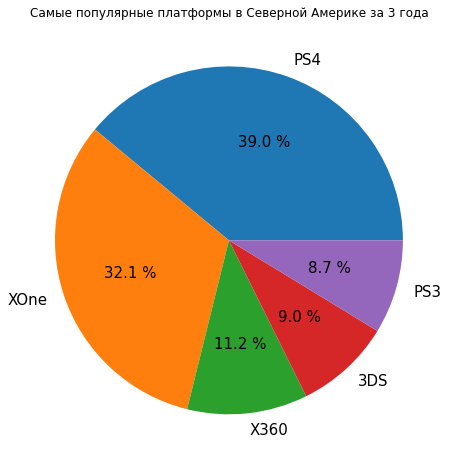

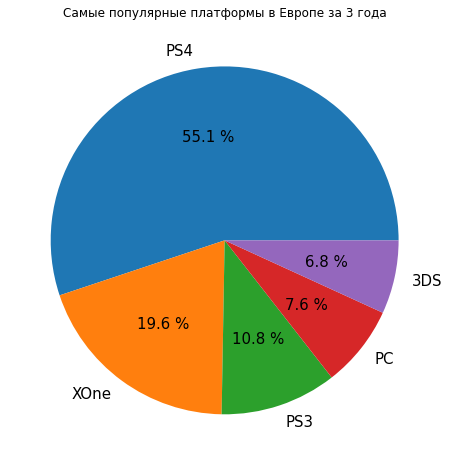

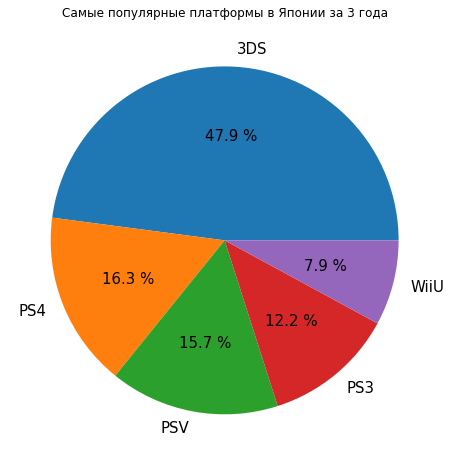

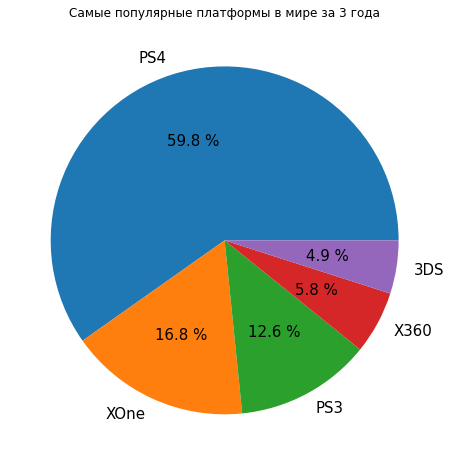

In [58]:
# создаём списки из нужных столбцов

columns1=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
columns2=['Северной Америке', 'Европе', 'Японии', 'мире']

# запускаем цикл с новой функцией
for i in range(len(columns1)):
    check_pie(df_actual, 'platform', columns1[i], 'платформы', columns2[i])

**Самые популярные платформы по миру за 3 года:**

* Северная Америка - PlayStation 4 - `39.0%`
* Европа - PlayStation 4 - `55.4%`
* Япония - Nintendo 3DS - `47.9%`
* В мире - PlayStation 4 - `59.8%`

### Топ 5 жанров по регионам

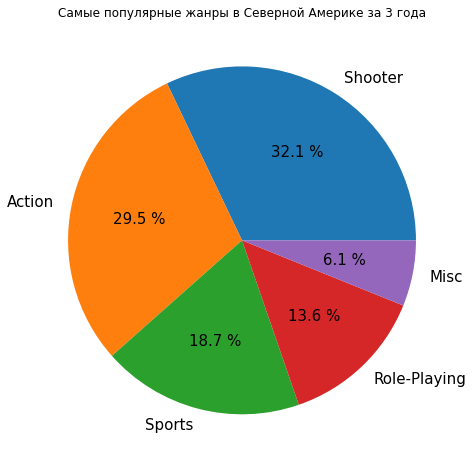

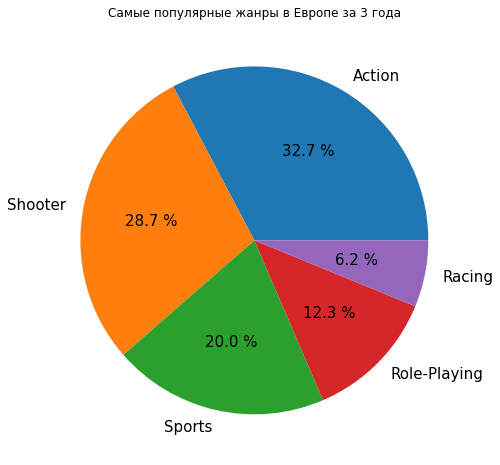

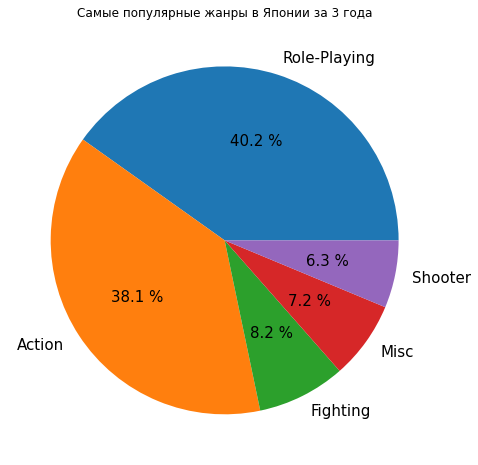

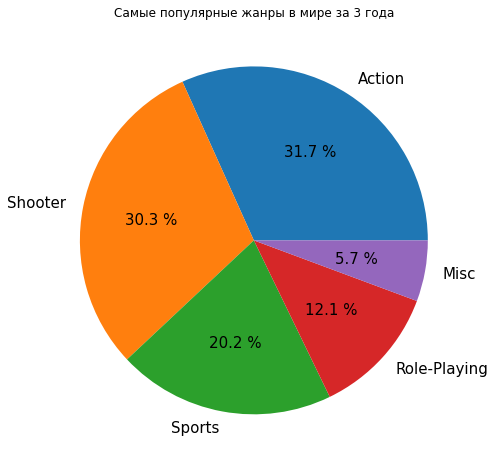

In [59]:
# повторяем предыдущие действия для актуальной даты

columns1=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
columns2=['Северной Америке', 'Европе', 'Японии', 'мире']

for i in range(len(columns1)):
    check_pie(df_actual, 'genre', columns1[i], 'жанры', columns2[i])

**Самые популярные жанры по миру за 3 года:**

* Северная Америка - Action - `32.1%`
* Европа - Action - `32.7%`
* Япония - Role-Playing - `40.2%`
* В мире - Action - `31.7%`

### Влияние рейтинга ESRB на продажи

**Построим график распределения продаж по рейтингу ESRB за всё время:**

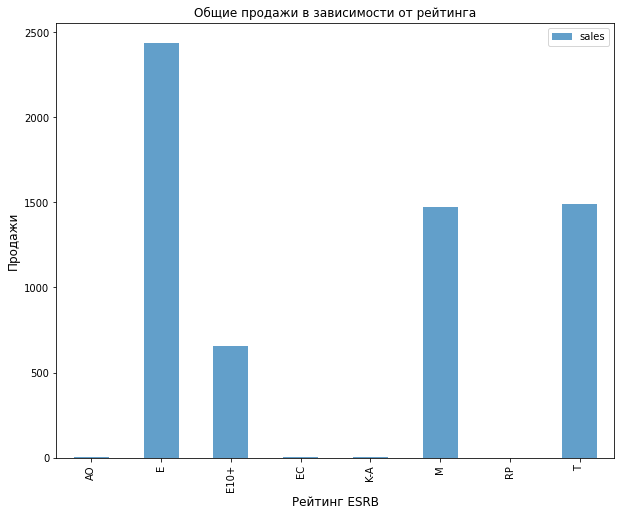

In [60]:
# сводная таблица
sales_per_esrb = df.pivot_table(index='rating', values='sales', aggfunc='sum')

# выводим график
sales_per_esrb.plot.bar(alpha=0.7, figsize=(10,8))
plt.title('Общие продажи в зависимости от рейтинга')
plt.ylabel('Продажи', fontsize = 'large')
plt.xlabel('Рейтинг ESRB', fontsize = 'large')
plt.show()

Согласно [wiki](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) рейтинги ESRB описывают:

* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* "K-A" ("Kids to Adults") — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

**Построим график распределения продаж по рейтингу ESRB в регионах за всё время:**

Для анализа рейтинга ESRB для всего времени, нужно сложить предыдущее название рейтинга `K-A` с актуальным названием - `E`.

> перед обработкой рейтинга заполним пропуски значением 'Not-rated' и проверим результат

In [61]:
df['rating'] = df['rating'].fillna('not-rated')
df_actual['rating'] = df_actual['rating'].fillna('not-rated')

In [62]:
# пересчитываем столбец и удаляем старый

sales_reg_esrb = df.groupby('rating').sum().loc[:, 'na_sales':'other_sales']
sales_reg_esrb.loc['E'] += sales_reg_esrb.loc['K-A'] 
sales_reg_esrb.drop(['K-A'], inplace=True)

In [63]:
# для цикла, всё таки, можно создать словарь, чтобы выводить нужные слова, исходя из названия столбца
# задаём словарь

names_reg = {'na_sales':'Северной Америке', 
             'eu_sales':'Европе', 
             'jp_sales':'Японии', 
             'other_sales':'мире'}

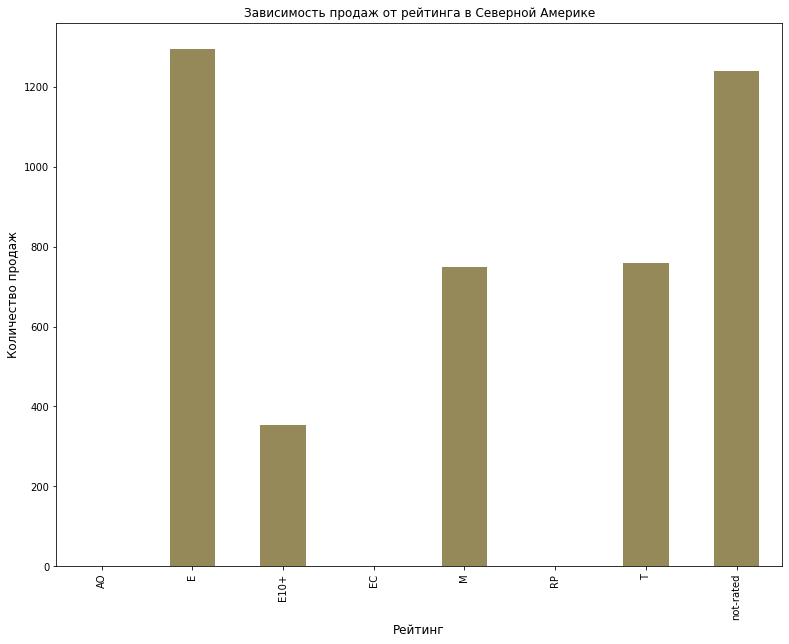

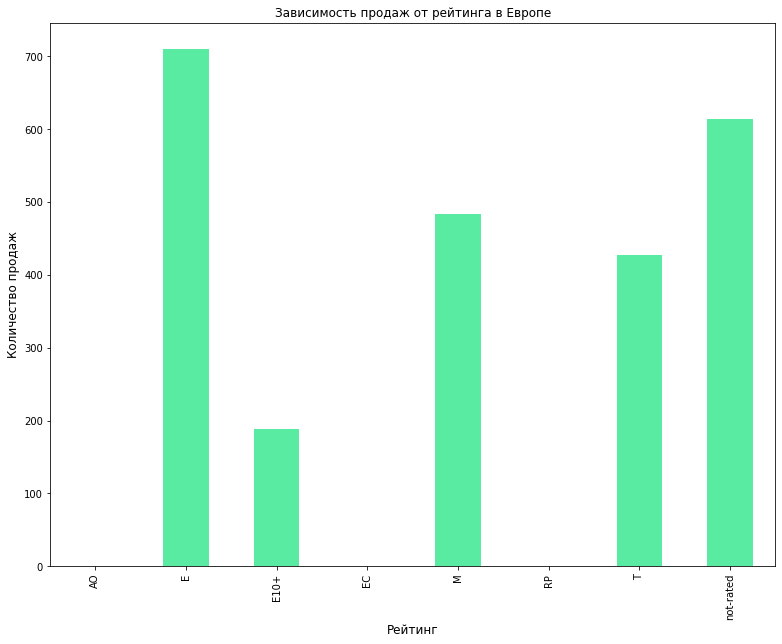

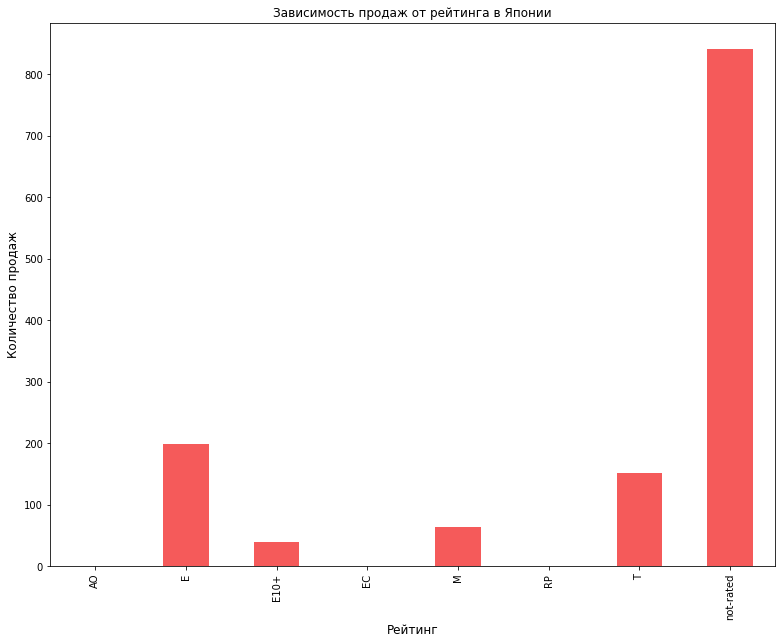

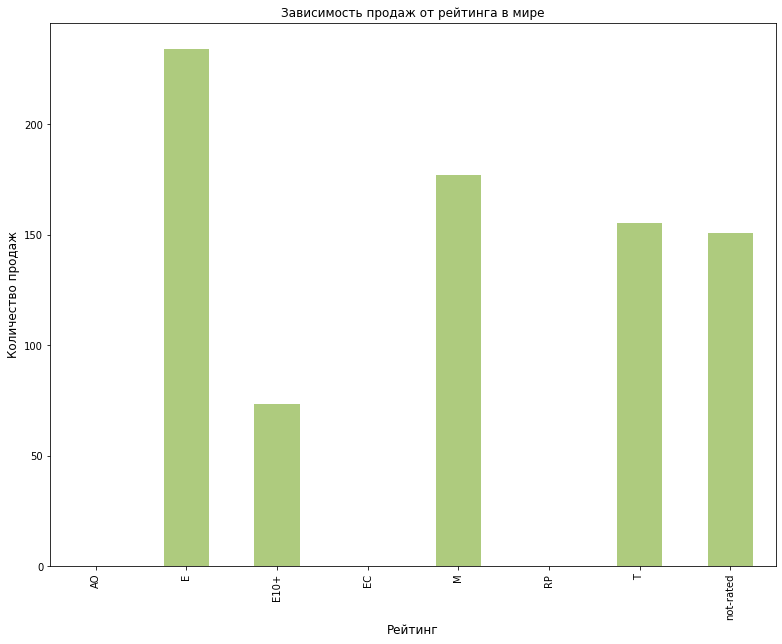

In [64]:
# запускаем цикл с выводом продаж исходя из рейтинга по платформам

for col in sales_reg_esrb.columns:
    plt.figure(figsize=(13,10))
    sales_reg_esrb[col].plot.bar(alpha=0.7, color=np.random.rand(3,))
    plt.title(f'Зависимость продаж от рейтинга в {names_reg[col]}', fontsize = 'large')
    plt.xlabel('Рейтинг', fontsize = 'large')
    plt.ylabel('Количество продаж', fontsize = 'large')
    plt.show()

**Вывод:**

* Больше всего продаж по всем регионам приходится на рейтинг "для всех".
* В Северной Америке и в Японии меньшее количество продаж приходится на рейтинг "для подростков"
* В Европе и в мире меньшее количество продаж приходится на рейтинг "для взрослых"
* Очень много продаж игр без рейтинга, люди при покупке не так часто обращают внимание на рейтинг.

**Построим график распределения продаж по рейтингу ESRB в регионах за 3 года:**

За 3 года складывать столбцы не придётся, потому строим графики:

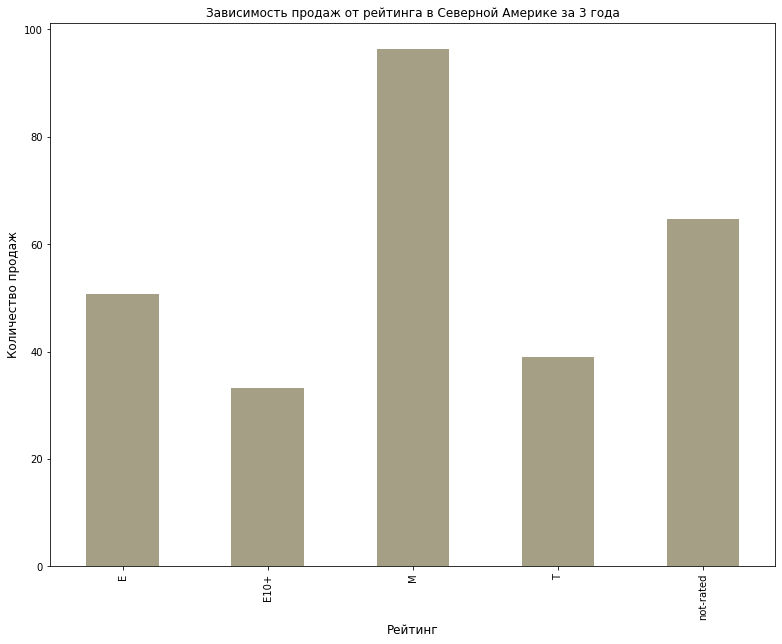

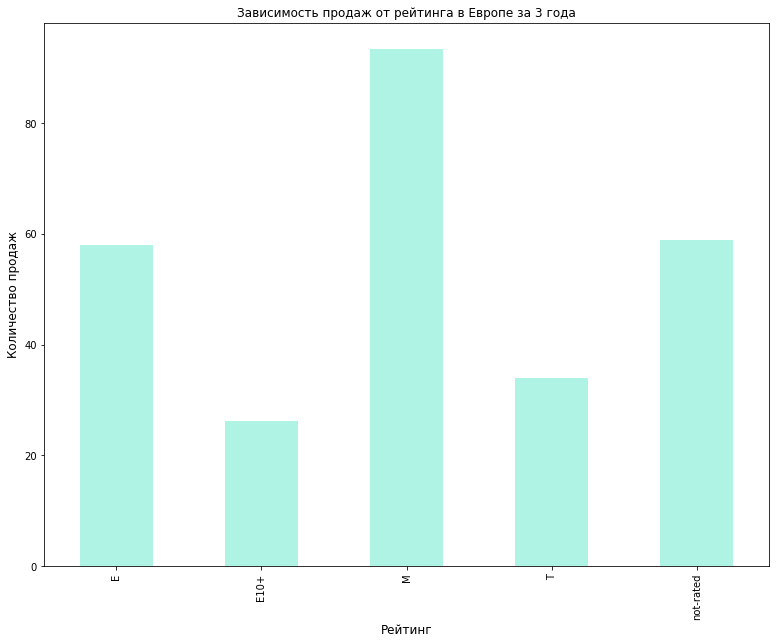

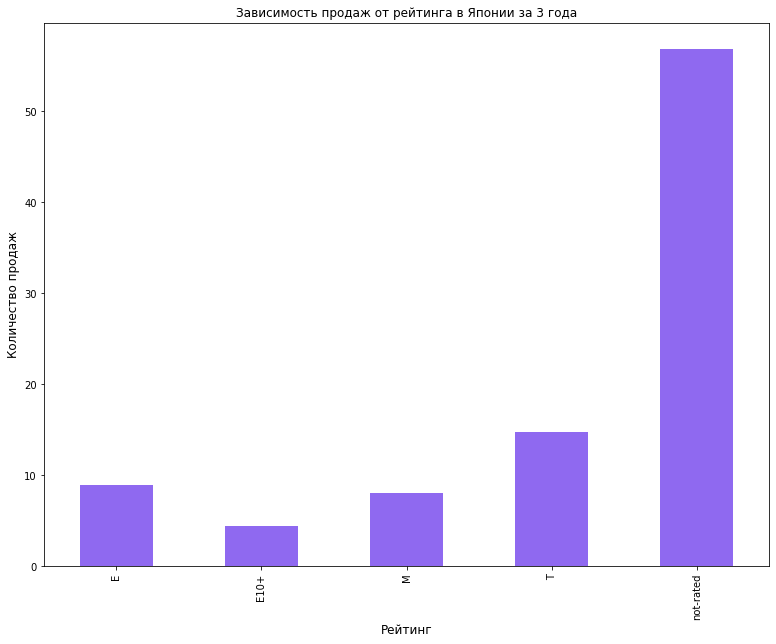

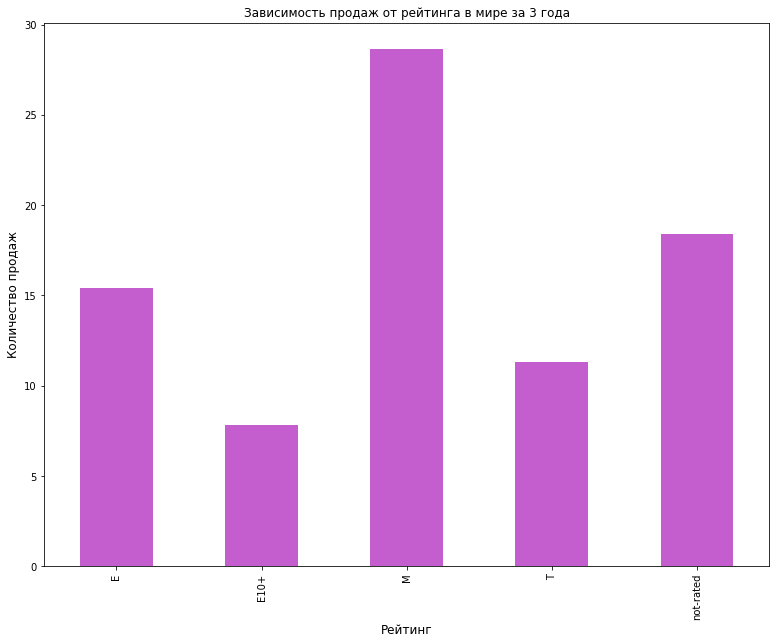

In [65]:
# выполняем предыдущие действия для актуального периода

sales_reg_esrb_actual = df_actual.groupby('rating').sum().loc[:, 'na_sales':'other_sales']

for col in sales_reg_esrb_actual.columns:
    plt.figure(figsize=(13,10))
    sales_reg_esrb_actual[col].plot.bar(alpha=0.7, color=np.random.rand(3,))
    plt.title(f'Зависимость продаж от рейтинга в {names_reg[col]} за 3 года', fontsize = 'large')
    plt.xlabel('Рейтинг', fontsize = 'large')
    plt.ylabel('Количество продаж', fontsize = 'large')
    plt.show()

**Вывод:**

* Больше всего продаж по 3-м регионам приходится на рейтинг "для взрослых"
* В Японии больше всего продаж у рейтинга "для всех" или с отсутсвующим рейтингом.
* Японцы, зачастую, не берут во внимание рейтинг ESRB

### Вывод

**Составим портрет пользователя по регионам за актуальный период - 3 года:**

* Для Северной Америки - владелец консоли Playstation 4 играющий в шутеры старше 18 лет.
* Для Европы - консольщик PlayStation 4 играющий в экшен старше 18 лет.
* Для Японии - игрок любого возраста с мобильной консолью Nintendo 3DS с ролевой игрой.


## Проверка гипотез

Гипотезы:

1. Средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Xbox ONE и PC

Составим нулевую гипотезу:
* Средние пользовательские рейтинги платформ Xbox ONE и PC не различаются.

И альтернативная гипотеза будет:
* Средние пользовательские рейтинги платформ Xbox ONE и PC и Ultra различаются.

Гипотеза о равенстве средних двух генеральных совокупностей.
Применяем двусторонний критерий, так как разница рейтингов по платформам может быть как в положительную сторону, так и в отрицательную.

In [66]:
# совокупности 
xuan = df.query('platform == "XOne" and not user_score.isna()')['user_score']
pc = df.query('platform == "PC" and not user_score.isna()')['user_score']

alpha = .05

# предположим, что совокупности отличаются, и дисперсия тоже
results = st.ttest_ind(
    xuan, 
    pc, 
    equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183529e-06
Отвергаем нулевую гипотезу


Есть предположение, что гипотезу можно отвергнуть, значит, в среднем, вероятно, что пользовательские рейтинги на одной из платформ будут больше, чем на другой.

### Action и Sports

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Составим нулевую гипотезу:
* Средние пользовательские рейтинги жанров Action и Sports не различаются.

И альтернативная гипотеза будет:
* Средние пользовательские рейтинги жанров Action и Sports различаются.

Гипотеза о равенстве средних двух генеральных совокупностей.
Применяем двусторонний критерий, так как разница рейтингов по жанрам может быть как в положительную сторону, так и в отрицательную.

In [67]:
# совокупности
action = df.query('genre == "Action" and not user_score.isna()')['user_score']
sports = df.query('genre == "Sports" and not user_score.isna()')['user_score']

alpha = .05

# предположим, что совокупности отличаются, и дисперсия тоже
results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791499177
Не получилось отвергнуть нулевую гипотезу


Гипотеза не отвергнута, а значит нет принципиальной разницы между оценками игроков в жанре Action и Sports.

## Общий вывод

**Заключение:**

* Большинство игр выпускалось с `1997 года`
* Характерная жизнь для консоли - `10 лет`. На первый и последний год, обычно, приходится меньшее число продаж. Актуальный период жизни платформы - `5 лет`, там приходится больше всего продаж
* Продажи по всем платформам за последние `3 года` снизились продажи, за период 2016 года датасет не полный.
* Нет ни одной плафтормы, где продажи растут, но нельзя полностью рассчитывать, что платформа перестанет приносить прибыль
* Есть только 4 потенциально прибыльные платформы: `Nintendo 3DS`, `Xbox ONE`, `PS4`, `PC`, из них `PlayStation 4` самая прибыльная. Стоит сделать ставку на `2017` год именно на эти платформы. Больше всего игры выпущено на этих консолях и на них самые большие продажи. И конечно, игровые хиты принадлежат этим же платформам.
* Чем оценки пользователей или критиков выше - тем выше продажи.
* Самые актуальные жанры за `3 года` и за всё время: **`Action`, `Sports`, `Role-Playing`, `Shooter`**. Они остаются в топе продаж как за всё время, так и за `3 года`.

**Портреты пользователей по регионам за 3 года:**
* Для Северной Америки - владелец консоли `Playstation 4` играющий в шутеры старше 18 лет.
* Для Европы - консольщик `PlayStation 4` играющий в экшен старше 18 лет.
* Для Японии - игрок любого возраста с мобильной консолью `Nintendo 3DS` с ролевой игрой.

**Статистический анализ:**
* Средние пользовательские рейтинги Xbox ONE и PC будут отличаться.
* Нет принципиальной разницы между оценками игроков в жанре Action и Sports.

**Исходя из общий выводов, можно сделать ставку по продукту (жанр, выпускаемая платформа, оценки критиков, рейтинг ESRB) исходя из региона в котором идут продажи**